In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import locale
# print(locale.getpreferredencoding())

# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"

# locale.getpreferredencoding = getpreferredencoding

In [ ]:
pip install catboost

In [ ]:
from datetime import datetime, timedelta
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import scipy.stats as stats
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import tensorflow as tf
import pickle
import keras
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from keras.layers import Dense
from datetime import date
from tqdm import tqdm
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import cupy as np
import os
import joblib
import seaborn as sns
import numpy as np2
import pandas as pd
import matplotlib
import random
import time
import math
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Let's write a function that returns a set of upper
#     and lower bounds + a set of all bounds

def range_prices(pa_t,pb_t,N_t):

    i_Bi = np.arange(N_t)
    bs_Bi = np.arange(pb_t, pa_t, - (pb_t - pa_t) / N_t)
    as_Bi = shift(bs_Bi.get(), - 1, cval = pa_t)
    pr_ranges = np.append(pb_t, as_Bi)

    return bs_Bi, as_Bi, pr_ranges

# since the set of prices is known, for a GIVEN tau, let us determine the prices-instants of time at which -
# - the reference bucket Z(s) is redefined.
# The moment of final zeroing after T final liquidity reset is not included in the set returned by the function

def z_list_t(tau, prices_c, mu_bucket, ind_in_):

    z_list = []
    for i in range(len(prices_c)):
        if i == 0:
            z_list.append(i)
            z_ = i
        else:
            if abs(ind_in_[i] - ind_in_[z_]) > tau:
                z_list.append(i)
                z_ = i
    z_list = np.asarray(z_list)

    return z_list

def x_Nd(_tau, _mu_bucket, pr0, range_prices_ex, a):

    x_ind_Z = np.digitize(pr0, range_prices_ex[2], right = True) - 1
    xi_ar = np.where(((np.tile(np.arange(_mu_bucket), (len(pr0),1)) > x_ind_Z.reshape(-1,1)) & (
        np.tile(np.arange(_mu_bucket), (len(pr0),1)) < x_ind_Z.reshape(-1,1) + _tau + 1)),a / (2 * _tau),
            np.where((np.tile(np.arange(_mu_bucket), (len(pr0),1)) < x_ind_Z.reshape(-1,1)) & (
                np.tile(np.arange(_mu_bucket), (len(pr0),1)) > x_ind_Z.reshape(-1,1) - _tau - 1),a / (2 * _tau),0))
    xi_ar[np.arange(len(pr0)), x_ind_Z] = 1 - np.sum(xi_ar,axis=1)

    return xi_ar



2024 100497
2023 78427


,Unnamed: 0,sender,recipient,amount0,amount1,transaction.id,Day_Year,price,vol
transaction.timestamp,,,,,,,,,
2024-10-01 20:51:35,0,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,3750.000000,-1.526684,0x2f052ef9322f74500c5a565477251c59c1aecbd05e81...,275,2456.303827,3750.000000
2024-10-01 20:50:47,1,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,2000.000000,-0.814328,0xa0930731f2e3b7ce4365f1c6b0fb5966f1d576859d4c...,275,2456.011780,2000.000000
2024-10-01 20:50:35,2,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,74783.770290,-30.497174,0x1858c1dbc88d88f21d4f8e4a8ada0393246b30761ec7...,275,2452.154139,74783.770290
2024-10-01 20:50:23,3,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0x9e0fc414e8d5c45b0890c32ab9329ac90b3ab534,802.112546,-0.327604,0xc55c1239fdc0451fc3738316b56820ef77e8d766ffda...,275,2448.420206,802.112546
2024-10-01 20:50:11,4,0x51c72848c68a965f66fa7a88855f9f7784502a7f,0x51c72848c68a965f66fa7a88855f9f7784502a7f,21291.428245,-8.699845,0x410b1556372c041a8a012cbc6b06d22b50bc98e77d04...,275,2447.334225,21291.428245
...,...,...,...,...,...,...,...,...,...
2023-02-28 07:11:47,178919,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,-487.283494,0.300000,0xccc6f39e67db8230353a099be78fe5a15564e3eec90d...,59,1624.278313,487.283494
2023-02-28 06:56:11,178920,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,-820.070975,0.504882,0x2b06735cced8d9e99fda244ffc709982fc2fcac88ad2...,59,1624.282983,820.070975
2023-02-28 06:54:23,178921,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,-812.144407,0.500000,0x74a4a5a6c66c910fd278ff72975ed679e5672ac9665a...,59,1624.288814,812.144407


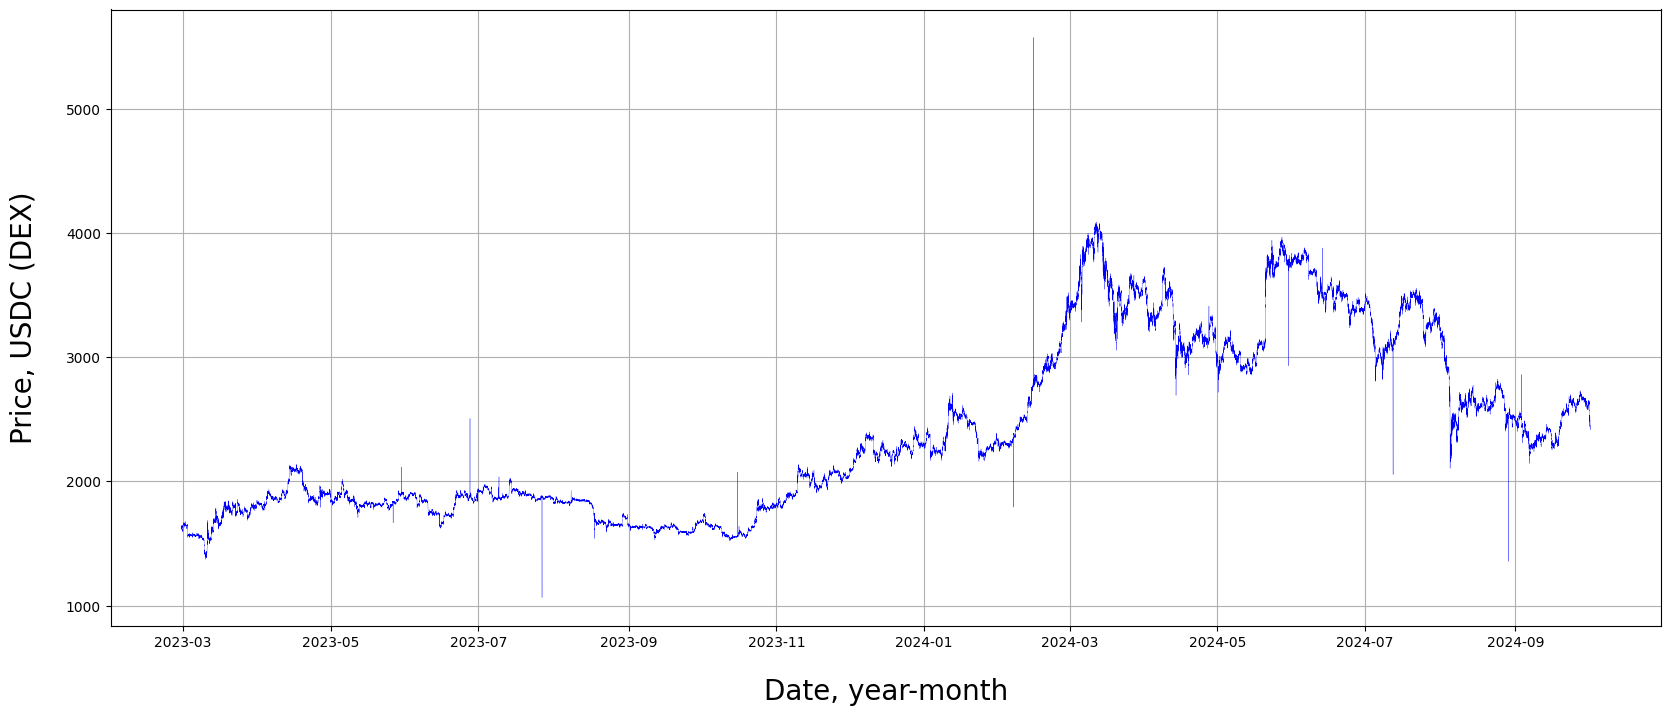

In [ ]:
# 2023-2024 year fact DEX - 0x8ad599c3A0ff1De082011EFDDc58f1908eb6e6D8 [USDC / ETH 0,3%]

df_23_24 = pd.read_csv('data_1stP_Total_F.csv')

df_23_24['transaction.timestamp'] = df_23_24['transaction.timestamp'].astype(int)
df_23_24['amount0'] = df_23_24['amount0'].astype(float)
df_23_24['amount1'] = df_23_24['amount1'].astype(float)
df_23_24['transaction.timestamp'] = pd.to_datetime(df_23_24['transaction.timestamp'], unit = 's')
df_23_24['Day_Year'] = 0

for y_dt in df_23_24['transaction.timestamp'].dt.year.unique():

    indx_ = np2.where(df_23_24['transaction.timestamp'].dt.year.values == y_dt)[0]
    df_23_24.loc[indx_,'Day_Year'] = np2.asarray((df_23_24.iloc[indx_][
        'transaction.timestamp'] - datetime(y_dt, 1, 1)).dt.days + 1)
    print(y_dt, len(df_23_24.loc[indx_]))

df_23_24.set_index('transaction.timestamp', inplace=True)

df_23_24 = df_23_24[abs(df_23_24['amount1']) > 0]
df_23_24 = df_23_24[abs(df_23_24['amount0']) > 0]

df_23_24['price'] = abs(df_23_24['amount0'] / df_23_24['amount1'])
df_23_24['vol'] = abs(df_23_24['amount0'])

display(df_23_24)

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_23_24['price'], linewidth = 0.2, color='blue', alpha = 1)

ax.set_xlabel('Date, year-month', labelpad = 20, fontsize = 20)
ax.set_ylabel('Price, USDC (DEX)', labelpad = 20, fontsize = 20)
ax.grid()
plt.show()

In [ ]:
# Remove price outliers

delt_pr = 1 - df_23_24['price'][:-1].values / df_23_24['price'][1:].values

drop_indx = np2.sort(
                np2.hstack((
                    np2.where(delt_pr > 0.1), np2.where(delt_pr < -0.1))))

df_23_24.index.values[drop_indx][0]

array(['2024-09-03T12:19:47.000000000', '2024-09-03T12:18:23.000000000',
       '2024-08-29T01:30:47.000000000', '2024-08-29T01:20:59.000000000',
       '2024-07-12T12:29:47.000000000', '2024-07-12T12:26:11.000000000',
       '2024-06-13T07:21:35.000000000', '2024-05-30T12:00:23.000000000',
       '2024-05-30T11:59:35.000000000', '2024-02-15T03:23:11.000000000',
       '2024-02-15T03:23:11.000000000', '2024-02-06T17:22:11.000000000',
       '2024-02-06T17:21:59.000000000', '2023-10-15T23:37:59.000000000',
       '2023-10-15T23:25:59.000000000', '2023-07-27T06:25:59.000000000',
       '2023-07-27T06:07:35.000000000', '2023-06-27T12:47:35.000000000',
       '2023-06-27T12:39:59.000000000', '2023-05-30T04:34:23.000000000',
       '2023-05-30T04:32:23.000000000', '2023-05-26T19:12:11.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_23_24.drop(['2024-09-03T12:19:47', '2024-09-03T12:18:23',
                '2024-08-29T01:30:47', '2024-08-29T01:20:59',
                '2024-07-12 12:29:47', '2024-07-12 12:26:11',
                '2024-06-13 07:21:35', '2024-05-30 12:00:23',
                '2024-05-30 11:59:35', '2024-02-15 03:23:11',
                '2024-02-15 03:23:11', '2024-02-06 17:22:11',
                '2024-02-06 17:21:59', '2023-10-15 23:37:59',
                '2023-10-15 23:25:59', '2023-07-27 06:25:59',
                '2023-07-27 06:07:35', '2023-06-27 12:47:35',
                '2023-06-27 12:39:59', '2023-05-30 04:34:23',
                '2023-05-30 04:32:23', '2023-05-26 19:12:11'], inplace=True)

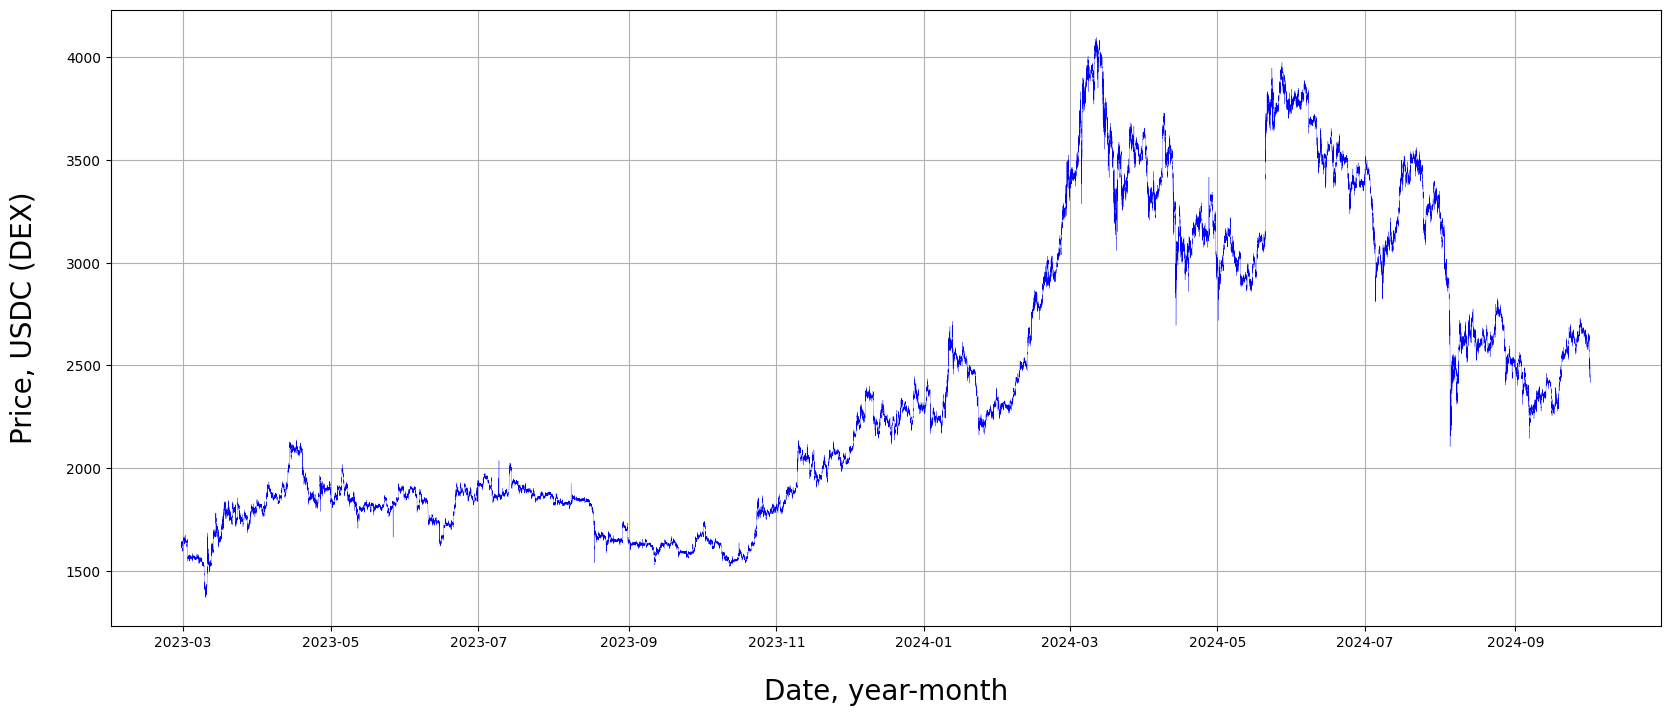

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_23_24['price'], linewidth = 0.2, color='blue', alpha = 1)

ax.set_xlabel('Date, year-month', labelpad = 20, fontsize = 20)
ax.set_ylabel('Price, USDC (DEX)', labelpad = 20, fontsize = 20)
ax.grid()
plt.show()

In [ ]:
# Train & OOT df

df_train = df_23_24[((df_23_24.index.normalize() < '2024-07-01') & (
    df_23_24.index.normalize() > '2023-03-31'))].copy() # 2Q2023-3Q2024
df_oot = df_23_24[((df_23_24.index.normalize() >= '2024-09-01') & (
    df_23_24.index.normalize() < '2024-10-01'))].copy() # 3Q2024

cols_ = ['price', 'vol']

df_train = df_train[cols_]
df_train = df_train.iloc[::-1].copy()

df_oot = df_oot[cols_]
df_oot = df_oot.iloc[::-1].copy()

In [ ]:
# Find the moments of the change of epoch under tau = 5
#  for given the parameters

n_rg = 650    # number of ranges. select so that the upper bound must be greater than the maximum value by (apprx_n // 2 +1)* av_w
tau = 40           # tau parametr
av_w = 10         # range width
mu_bucket = n_rg
cu_pr = np.mean(df_train['price']).item() # select distribution center
price_test = np.array(df_train['price'])
prices_c = price_test.reshape(1, -1)
price_t_up = n_rg * av_w # upper bound of the simulated pool. must be greater than the max hist price!
price_t_down = 0 # lower bound of the simulated pool. must be less than the max hist price!
range_prices_ = range_prices(price_t_down, price_t_up, mu_bucket)

pr = prices_c[0] # it is possible to submit a set of price arrays. now just one
ind_in = np.digitize(pr, range_prices_[2], right = True)
z_moments_t = z_list_t(tau, pr.get(), mu_bucket, ind_in.get()) # moments of capital relocation for tau = 5. without the last one!

z_list = z_moments_t
z_list = np.hstack((z_list, len(df_train['price']))) # add the last moment
pr_total = pr

ep_n = np.zeros((len(df_train))).astype(int) # the epoch of each observation

for i in tqdm(range(0, len(z_list) - 1)):
    ep_n[z_list[i]: z_list[i + 1] + 1] = int(i)

100%|██████████| 15/15 [00:00<00:00, 76.17it/s]


In [ ]:
ep_time_ar = df_train.index[z_moments_t.get()]
ep_time_ar = np2.diff(ep_time_ar).astype('timedelta64[h]')
print('average duration of an epoch:', '\n',
      np.mean(ep_time_ar), '\n',
      np.round(np.mean(np.diff(z_list)),1), 'prices')

average duration of an epoch: 
 749 hours 
 8505.1 prices


eth nan check: [0 0]
btc nan check: [0 0]


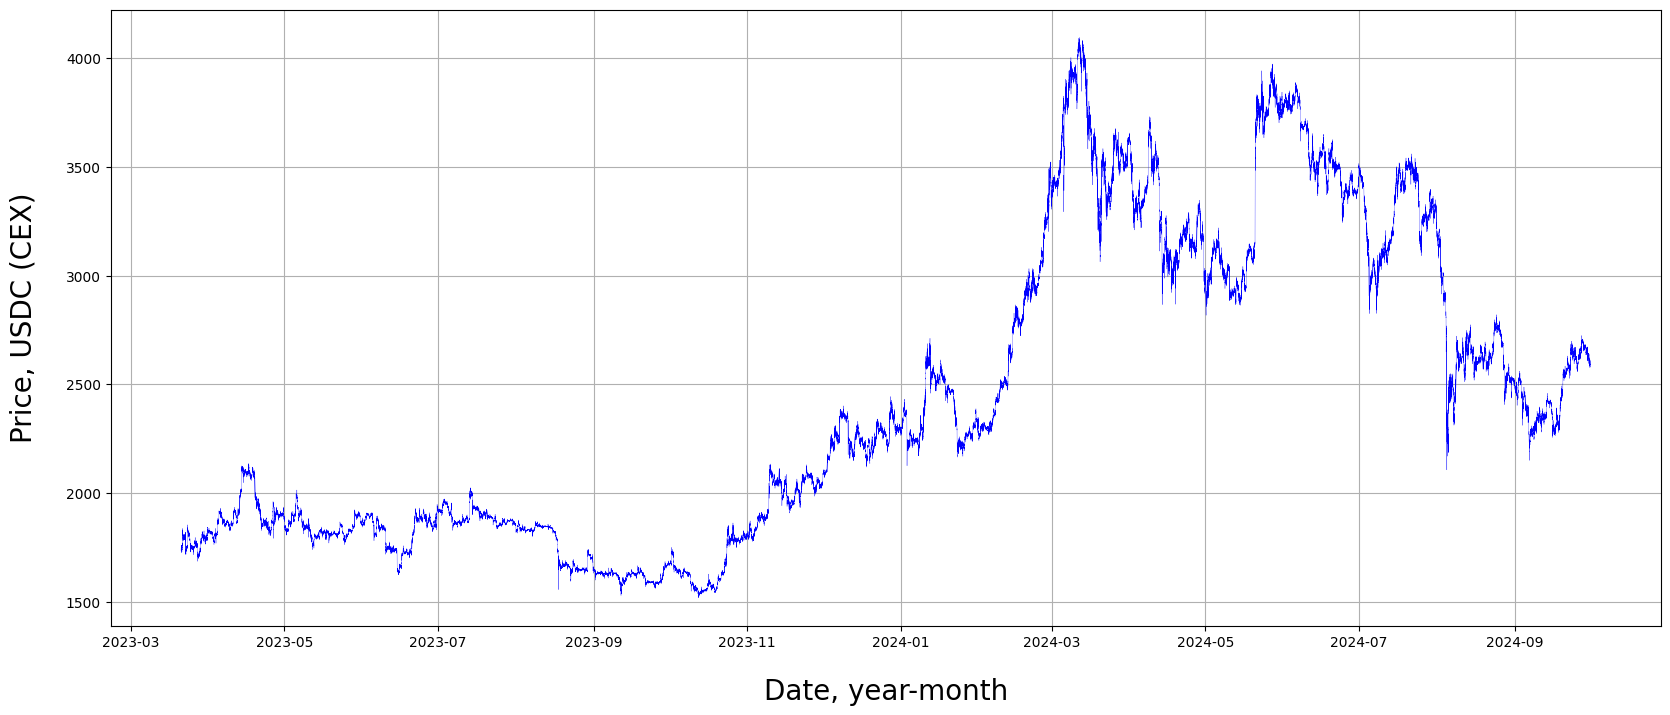

In [ ]:
# Each moment of the change of epochs corresponds to the state of the market (info from CEX).
# This is "market" data for a pair not from a specific DEX pool (data for training the model).
# We will load the data (OHLCV) and create additional features based on the existing data.

btc_df = pd.read_csv('btc_usdc_23_24_1m_F.csv')
eth_df = pd.read_csv('eth_usdc_23_24_1m_F.csv')

btc_df['time'] = pd.to_datetime(btc_df['time'])
eth_df['time'] = pd.to_datetime(eth_df['time'])

btc_df = btc_df.set_index(['time'])
eth_df = eth_df.set_index(['time'])

btc_df = btc_df[btc_df.index.normalize() > '2023-03-20'].copy()
eth_df = eth_df[eth_df.index.normalize() > '2023-03-20'].copy()

btc_df['volume'].replace(0, 0.00000001, inplace = True)
eth_df['volume'].replace(0, 0.00000001, inplace = True)

print('eth nan check:', pd.isna(eth_df).sum().values)
print('btc nan check:', pd.isna(btc_df).sum().values)

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(eth_df['close'], linewidth = 0.2, color='blue', alpha = 1)

ax.set_xlabel('Date, year-month', labelpad = 20, fontsize = 20)
ax.set_ylabel('Price, USDC (CEX)', labelpad = 20, fontsize = 20)
ax.grid()
plt.show()

In [ ]:
# Feature generation functions

def rolling_window_np(a, window):

    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    st = np2.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

    return st

def data_transform(df, macd_1, macd_2, std_long, std_short):

    t_min = macd_1
    eth_k_min = df['close'].ewm(span = 12 * t_min, adjust = False, min_periods = 12 * t_min).mean()
    eth_d_min = df['close'].ewm(span = 26 * t_min, adjust = False, min_periods = 26 * t_min).mean()
    eth_macd_min = eth_k_min - eth_d_min
    eth_macd_s_min = eth_macd_min.ewm(span = 9 * t_min, adjust = False, min_periods = 9 * t_min).mean()
    eth_macd_h_min = eth_macd_min - eth_macd_s_min
    df['k_min'] = eth_k_min
    df['d_min'] = eth_d_min
    df['macd_min'] = eth_macd_min
    df['signal_min'] = eth_macd_s_min
    df['del_min'] = eth_macd_h_min

    t_h = macd_2
    eth_k_h = df['close'].ewm(span = 12 * t_h, adjust = False, min_periods = 12 * t_h).mean()
    eth_d_h = df['close'].ewm(span = 26 * t_h, adjust = False, min_periods = 26 * t_h).mean()
    eth_macd_h = eth_k_h - eth_d_h
    eth_macd_s_h = eth_macd_h.ewm(span = 9 * t_h, adjust = False, min_periods = 9 * t_h).mean()
    eth_macd_h_h = eth_macd_h - eth_macd_s_h

    df['k_h'] = eth_k_h
    df['d_h'] = eth_d_h
    df['macd_h'] = eth_macd_h
    df['signal_h'] = eth_macd_s_h
    df['del_h'] = eth_macd_h_h

    std_per = std_long
    df[f'std_{std_long}'] = 0
    df[f'std_{std_long}'].iloc[std_per - 1:] = np.std(rolling_window_np(df.close.values, std_per), 1)

    std_per = std_short
    df[f'std_{std_short}'] = 0
    df[f'std_{std_short}'].iloc[std_per - 1:] = np.std(rolling_window_np(df.close.values, std_per), 1)

    df['std_d'] = df[f'std_{std_short}'] - df[f'std_{std_long}']

    df = df.iloc[(26 + 9) * t_h - 2:,:]

    return df

def find_nearest_d(array, value):

    idx = (np2.abs(array - value)).argmin()

    return array[idx], idx

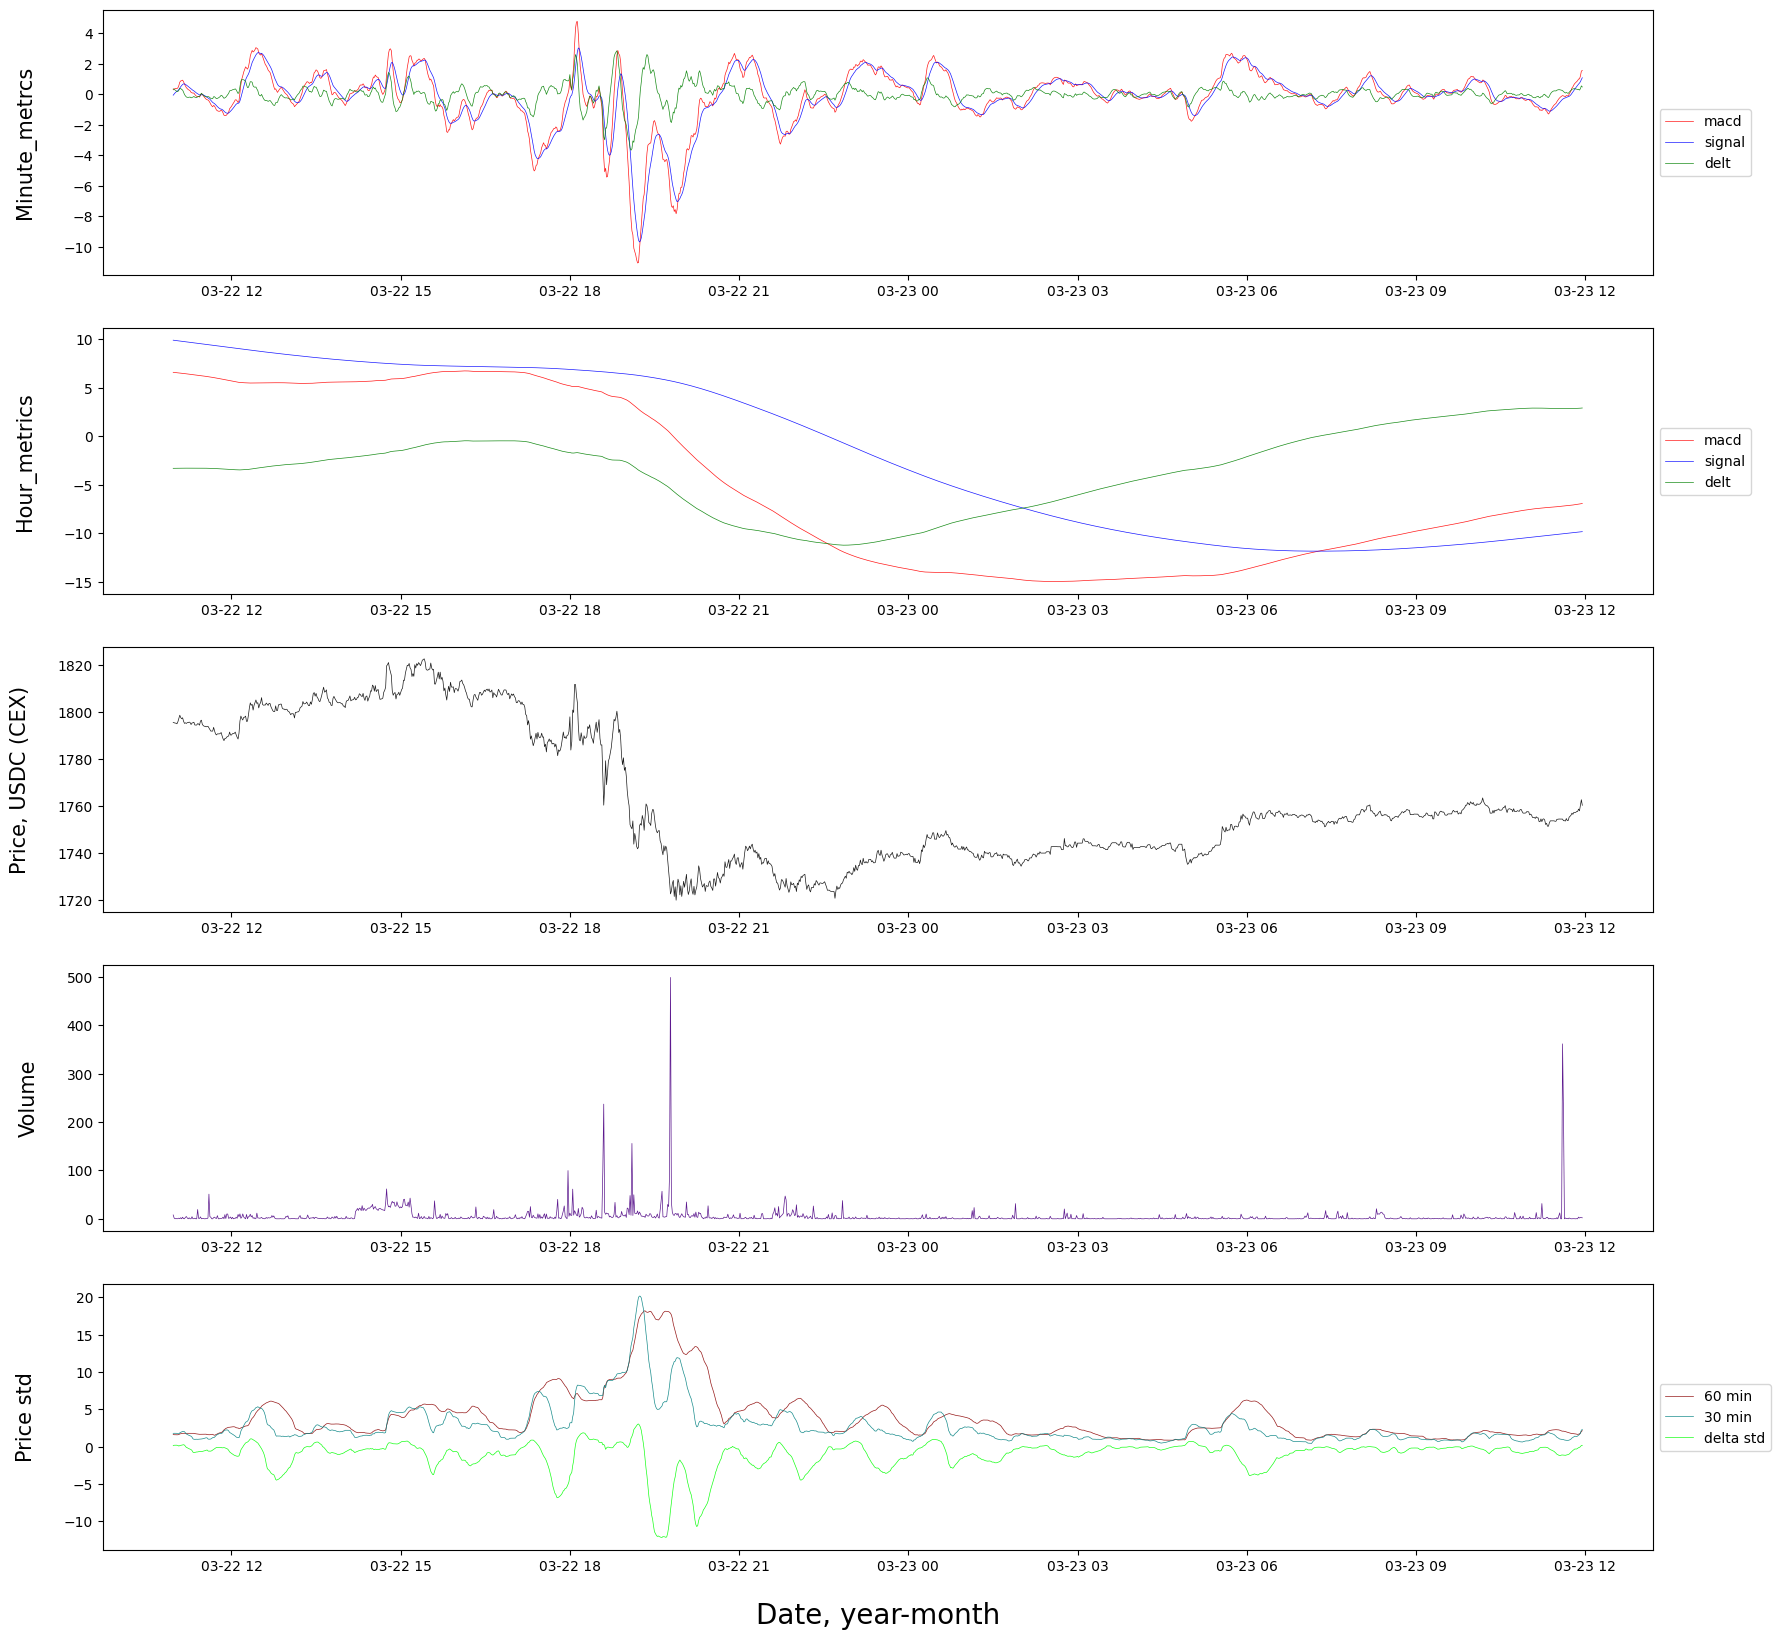

In [ ]:
# Show illustrations of generated features on the entire train sample

macd_1_ = 1
macd_2_ = 60
std_long_ = 60
std_short_ = 30

eth_df_ill = data_transform(eth_df, macd_1_, macd_2_, std_long_, std_short_)
btc_df_ill = data_transform(btc_df, macd_1_, macd_2_, std_long_, std_short_)

ind_ = 1500
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(20, 20))

ax5.set_ylabel('Price std', labelpad = 20, fontsize = 15)
ax5.plot(eth_df_ill.iloc[:ind_,:]['std_60'], linewidth=0.5, color='darkred', alpha = 0.9, label = '60 min')
ax5.plot(eth_df_ill.iloc[:ind_,:]['std_30'], linewidth=0.5, color='teal', alpha = 0.9, label = '30 min')
ax5.plot(eth_df_ill.iloc[:ind_,:]['std_d'], linewidth=0.5, color='lime', alpha = 0.9, label = 'delta std')

ax4.set_ylabel('Volume', labelpad = 20, fontsize = 15)
ax4.plot(eth_df_ill.iloc[:ind_,:]['volume'], linewidth=0.5, color='indigo', alpha = 0.9, label = 'vol')

ax3.set_ylabel('Price, USDC (CEX)', labelpad = 20, fontsize = 15)
ax3.plot(eth_df_ill.iloc[:ind_,:]['close'], linewidth=0.5, color='black', alpha = 0.9, label = 'price')

ax2.set_ylabel('Hour_metrics', labelpad = 20, fontsize = 15)
ax2.plot(eth_df_ill.iloc[:ind_,:]['macd_h'], linewidth=0.5, color='red', alpha = 0.9, label = 'macd')
ax2.plot(eth_df_ill.iloc[:ind_,:]['signal_h'], linewidth=0.5, color='blue', alpha = 0.9, label = 'signal')
ax2.plot(eth_df_ill.iloc[:ind_,:]['del_h'], linewidth=0.5, color='green', alpha = 0.9, label = 'delt')

ax1.set_ylabel('Minute_metrcs', labelpad = 20, fontsize = 15)
ax1.plot(eth_df_ill.iloc[:ind_,:]['macd_min'], linewidth=0.5, color='red', alpha = 0.9, label = 'macd')
ax1.plot(eth_df_ill.iloc[:ind_,:]['signal_min'], linewidth=0.5, color='blue', alpha = 0.9, label = 'signal')
ax1.plot(eth_df_ill.iloc[:ind_,:]['del_min'], linewidth=0.5, color='green', alpha = 0.9, label = 'delt')

ax1.legend(title = "" ,bbox_to_anchor = (1.0, .65), loc = 'upper left')
ax2.legend(title = "" ,bbox_to_anchor = (1.0, .65), loc = 'upper left')
ax5.legend(title = "" ,bbox_to_anchor = (1.0, .65), loc = 'upper left')

ax5.set_xlabel('Date, year-month', labelpad = 20, fontsize = 20)
plt.show()

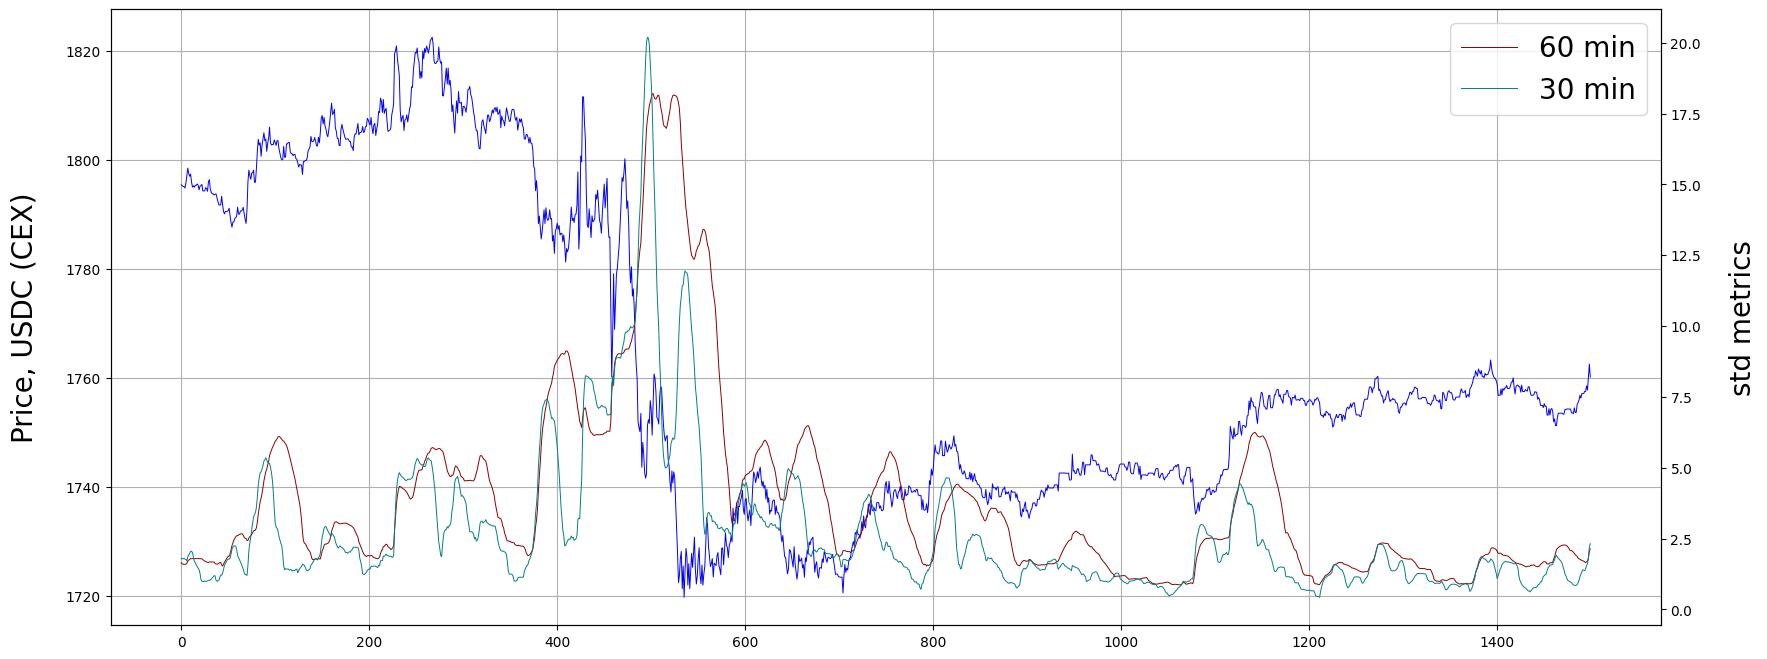

In [ ]:
# volatility feature

fig, host = plt.subplots(figsize=(20, 8))
par1 = host.twinx()

host.plot(eth_df_ill.iloc[:ind_,:]['close'].values, "blue", linewidth = 0.7)
par1.plot(eth_df_ill.iloc[:ind_,:]['std_60'].values, "darkred", linewidth = 0.7, label = '60 min')
par1.plot(eth_df_ill.iloc[:ind_,:]['std_30'].values, "teal", linewidth = 0.7, label = '30 min')

host.set_ylabel('Price, USDC (CEX)', labelpad = 20, fontsize = 20)
par1.set_ylabel('std metrics', labelpad = 20, fontsize = 20)
plt.legend(prop={'size':20})
host.grid()
plt.show()

In [ ]:
def V_init_max(mu_bucket, pa_Bi, pb_Bi):

    V_Bi = np.zeros((mu_bucket + 2, 6)) # 2D matrix with the number of buckets+2 to represent prices above/below the range
    V_Bi[:,5] = np.arange(mu_bucket + 2) # Let's number the buckets. 0th and last hypothetical
    V_Bi[1:-1,4] = np.asarray(pa_Bi) # upper limit of the bucket
    V_Bi[1:-1,3] = np.asarray(pb_Bi) # lower limit of the bucket
    V_Bi[1:-1,2] = 0 # fixed liquidity

    return V_Bi

def V_2d_max(price, range_prices_, V_m, L_cur):

    ind_in_ = np.digitize(price, range_prices_, right = True)#.item()

    V_m[1:ind_in_, 1] = 0
    V_m[1:ind_in_, 0] = 1 / np.sqrt(V_m[1:ind_in_, 4]) - 1 / np.sqrt(V_m[1:ind_in_,3])

    V_m[ind_in_ + 1:-1, 1] = np.sqrt(V_m[ind_in_ + 1:-1,3]) - np.sqrt(V_m[ind_in_ + 1:-1,4])
    V_m[ind_in_ + 1:-1, 0] = 0

    sqrt_price = np.sqrt(price)
    V_m[ind_in_, 1] = sqrt_price - np.sqrt(V_m[ind_in_,4])
    V_m[ind_in_, 0] = 1 / sqrt_price - 1/ np.sqrt(V_m[ind_in_,3])

    V_m[1:-1,2] = L_cur
    V_m[:,:2] *= V_m[:, 2, np.newaxis]

    return V_m


def V_3d_max(prices, ind_in_func, V_m, L_cur, _gamma):

    ind_in = ind_in_func
    V_Bi2_0 = np.tile(V_m, (len(ind_in), 1, 1))

    n_V = L_cur.shape[0]
    chunk_size = 5

    result_shape = (n_V, V_Bi2_0.shape[0], V_Bi2_0.shape[1], V_Bi2_0.shape[2])
    ret_ep_total = np.zeros(n_V)

    for i_V in range(0, n_V, chunk_size):

        chunk_slice = slice(i_V, i_V + chunk_size)
        V_Bi2_chunk = np.tile(V_Bi2_0, (chunk_size, 1, 1, 1))

        ind_up_ = V_Bi2_chunk[:, :, :, 5] < ind_in.reshape(-1, 1)
        ind_dwn_ = V_Bi2_chunk[:, :, :, 5] > ind_in.reshape(-1, 1)
        ind_in_ = V_Bi2_chunk[:, :, :, 5] == ind_in.reshape(-1, 1)

        V_Bi2_chunk[:, :, :, 1][ind_up_] = 0
        V_Bi2_chunk[:, :, :, 0][ind_up_] = (
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_up_]) -
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_up_]))

        V_Bi2_chunk[:, :, :, 1][ind_dwn_] = (
            np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_dwn_]) -
            np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_dwn_]))
        V_Bi2_chunk[:, :, :, 0][ind_dwn_] = 0

        V_Bi2_chunk[:, :, :, 1][ind_in_] = (
            np.tile(np.sqrt(prices), chunk_size) -
            np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_in_]))
        V_Bi2_chunk[:, :, :, 0][ind_in_] = (
            1 / np.tile(np.sqrt(prices), chunk_size) -
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_in_]))

        V_Bi2_chunk[:, :, 1:-1, 2] = np.repeat(
            L_cur[chunk_slice, np.newaxis, :], prices.shape[0], axis=1)

        np.multiply(
            V_Bi2_chunk[:, :, :, :2],
            V_Bi2_chunk[:, :, :, 2:3],
            out=V_Bi2_chunk[:, :, :, :2])

        ret_ep = np.diff(V_Bi2_chunk[:, :, 1:-1, :2], axis=1)
        ret_ep = np.maximum(ret_ep, 0)

        ret_ep[:,:,:,0] *= prices[-1]
        ret_ep = np.sum(ret_ep, axis=(1, 2, 3)) * _gamma

        ret_ep_total[chunk_slice] = ret_ep

    return ret_ep_total

def V_3d_max_LP(prices, ind_in_func, V_m, L_cur, Li_ep_LP, _gamma, TYPE_M = 0, DYN_W = False):

    ind_in = ind_in_func
    V_Bi2_0 = np.tile(V_m, (len(ind_in), 1, 1))

    n_V = L_cur.shape[0]
    chunk_size = n_V

    ratio_L = np.where(Li_ep_LP > L_cur, 1, Li_ep_LP / L_cur) # end14-03
    ratio_Lw = Li_ep_LP / L_cur
    result_shape = (n_V, V_Bi2_0.shape[0], V_Bi2_0.shape[1], V_Bi2_0.shape[2])

    for i_V in range(0, n_V, chunk_size):

        chunk_slice = slice(i_V, i_V + chunk_size)
        V_Bi2_chunk = np.tile(V_Bi2_0, (chunk_size, 1, 1, 1))

        ind_up_ = V_Bi2_chunk[:, :, :, 5] < ind_in.reshape(-1, 1)
        ind_dwn_ = V_Bi2_chunk[:, :, :, 5] > ind_in.reshape(-1, 1)
        ind_in_ = V_Bi2_chunk[:, :, :, 5] == ind_in.reshape(-1, 1)

        V_Bi2_chunk[:, :, :, 1][ind_up_] = 0
        V_Bi2_chunk[:, :, :, 0][ind_up_] = (
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_up_]) -
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_up_]))

        V_Bi2_chunk[:, :, :, 1][ind_dwn_] = (
            np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_dwn_]) -
            np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_dwn_]))
        V_Bi2_chunk[:, :, :, 0][ind_dwn_] = 0

        V_Bi2_chunk[:, :, :, 1][ind_in_] = (
            np.tile(np.sqrt(prices), chunk_size) -
            np.sqrt(V_Bi2_chunk[:, :, :, 4][ind_in_]))
        V_Bi2_chunk[:, :, :, 0][ind_in_] = (
            1 / np.tile(np.sqrt(prices), chunk_size) -
            1 / np.sqrt(V_Bi2_chunk[:, :, :, 3][ind_in_]))

        V_Bi2_chunk[:, :, 1:-1, 2] = np.repeat(
            L_cur[chunk_slice, np.newaxis, :], prices.shape[0], axis=1)

        np.multiply(
            V_Bi2_chunk[:, :, :, :2],
            V_Bi2_chunk[:, :, :, 2:3],
            out=V_Bi2_chunk[:, :, :, :2])

        ret_ep = V_Bi2_chunk[:, :, 1:-1, :2].copy()
        ret_ep[:,:,:,0] *= prices[-1]

        if DYN_W and TYPE_M == 0:
            w_ep = ret_ep.copy()
            w_LP_ep = np.sum(ratio_Lw * np.sum(w_ep[0,-1,:,:], axis = 1), axis = 1)
        elif DYN_W and TYPE_M == 1:
            w_ep = ret_ep.copy()
            w_ep = np.sum(w_ep[:,-1,:,:].reshape(n_rg, 2), axis=1, keepdims=True)
            w_LP_ep = np.sum(ratio_Lw * w_ep.T, axis = 1, keepdims=True)
        else:
            w_LP_ep = 0

        ret_ep = np.diff(ret_ep, axis=1)
        ret_ep = np.maximum(ret_ep, 0)

        ret_ep = np.sum(ret_ep, axis = 1) * _gamma
        ret_ep_pool = np.sum(ret_ep)
        ret_ep = np.sum(ret_ep, axis = 2)
        ret_ep = np.sum(ratio_L * ret_ep, axis = 1)

    return ret_ep, ret_ep_pool, w_LP_ep, ratio_Lw, V_Bi2_chunk#, V_Bi2_0, V_Bi2_chunk, i_V

def Li_Ei_max(price_upd, W, xi_array, ind_in, V_1):

    L_ar = np.zeros(xi_array.shape)
    Wx = W * xi_array
    p_up = price_upd
    ind_up = ind_in[0] - 1
    L_ar[:,:ind_up] = Wx[:,:ind_up] / p_up * np.sqrt(V_1[:,4][1:ind_up + 1] * V_1[
        :,3][1:ind_up + 1]) / (np.sqrt(V_1[:,3][1:ind_up + 1]) - np.sqrt(V_1[:,4][1:ind_up + 1]))
    L_ar[:,ind_up:] = Wx[:,ind_up:] / (np.sqrt(V_1[:,3][ind_up + 1:-1]) - np.sqrt(
        V_1[:,4][ind_up + 1:-1]))

    if p_up != V_1[:,3][ind_up + 1]:
        x_ = (np.sqrt(V_1[:,3][ind_up + 1]) * np.sqrt(p_up)) / (np.sqrt(V_1[:,3][ind_up + 1]) - np.sqrt(p_up))
        y_ = 1/(np.sqrt(p_up) - np.sqrt(V_1[:,4][ind_up + 1]))
        L_ar[:,ind_up] = Wx[:,ind_up] / (p_up +x_ / y_) * x_

    return L_ar

# main functions
def v3_model_max(W_init, price_set, xi_array, _mu_bucket,
                 range_prices_func_0, range_prices_func_1,range_prices_func_2,
                 ind_in_func, _gamma):

    i = 0
    W_ = W_init
    V_0 = V_init_max(_mu_bucket, range_prices_func_1, range_prices_func_0)

    V_2d_ep = V_2d_max(price_set[0], range_prices_func_2, V_0, 1)
    Li_ep = Li_Ei_max(price_set[0], W_, xi_array, ind_in_func, V_2d_ep)
    V_3d_ep = V_3d_max(price_set, ind_in_func, V_0, Li_ep, _gamma)

    return V_3d_ep

def v3_model_LP_max(W_init, W_init_LP, price_set, xi_array_opt, LP_array, _mu_bucket,
                 range_prices_func_0, range_prices_func_1,range_prices_func_2,
                 ind_in_func, _gamma, TYPE_M = 0, DYN_W = False):# add one optim xi_ar pool

    i = 0
    W_ = W_init
    V_0 = V_init_max(_mu_bucket, range_prices_func_1, range_prices_func_0)
    V_2d_ep = V_2d_max(price_set[0], range_prices_func_2, V_0, 1)

    Li_ep = Li_Ei_max(price_set[0], W_, xi_array_opt, ind_in_func, V_2d_ep)
    Li_ep_LP = Li_Ei_max(price_set[0], W_init_LP, LP_array, ind_in_func, V_2d_ep)

    V_3d_ep = V_3d_max_LP(price_set, ind_in_func, V_0, Li_ep, Li_ep_LP, _gamma, TYPE_M, DYN_W)

    return V_3d_ep

def find_and_check_nearest(array, value, threshold=0.1):

    array = np.asarray(array)
    idx = np.abs(array - value).argmin()
    nearest_value = array[idx]

    is_within_threshold = abs(nearest_value / value - 1) <= threshold

    return nearest_value, idx, is_within_threshold

def generate_normalized_vectors(m, k, distribution='uniform'):

    if distribution == 'uniform':
        vectors = np.random.uniform(0, 1, (m, k+1))
    elif distribution == 'normal':
        vectors = np.random.normal(0, 1, (m, k+1))
    elif distribution == 'exponential':
        vectors = np.random.exponential(1, (m, k+1))
    else:
        raise ValueError("Unsupported distribution")

    normalized_vectors = np.maximum(vectors / vectors.sum(axis=1, keepdims=True), 1e-60)

    return normalized_vectors

def x_Nd_best(tau, mu_bucket, p0, range_prices_2, best_str):

    x_ind_Z = np.digitize(p0, range_prices_2, right = True) - 1
    xi_arange = np.tile(np.arange(mu_bucket), (best_str.shape[0], 1))
    xi_ar = np.tile(np.zeros(mu_bucket), (best_str.shape[0], 1))

    if tau != 0:
        u_r = np.where((xi_arange > x_ind_Z.reshape(-1,1)) & (xi_arange < x_ind_Z.reshape(-1,1) + tau + 1))[0]
        xi_ar[np.where((xi_arange > x_ind_Z.reshape(-1,1)) & (xi_arange < x_ind_Z.reshape(-1,1) + tau + 1))] = ratio_right_best(u_r, best_str)
        u_l = np.where((xi_arange < x_ind_Z.reshape(-1,1)) & (xi_arange > x_ind_Z.reshape(-1,1) - tau - 1))[0]
        xi_ar[np.where((xi_arange < x_ind_Z.reshape(-1,1)) & (xi_arange > x_ind_Z.reshape(-1,1) - tau - 1))] = ratio_left_best(u_l, best_str)
    xi_ar[np.where(xi_arange == x_ind_Z.reshape(-1,1))] = 1 - np.sum(xi_ar, axis = 1)

    return xi_ar, best_str

def ratio_right_best(u_, best_str):

    n_list = []
    k = 0

    for bucket_r in np.split(u_, (np.where(np.diff(u_) > 0)[0] + 1).tolist()):
        ar = best_str[k][1:len(bucket_r) + 1] / 2
        if k == 0:
            ar_T = ar
        else:
            ar_T = np.concatenate((ar_T, ar))
        k += 1

    return ar_T

def ratio_left_best(u_, best_str):

    n_list = []
    k = 0

    for bucket_l in np.split(u_, (np.where(np.diff(u_) > 0)[0] + 1).tolist()):
        ar = np.flip(best_str[k][1:len(bucket_l) + 1]) / 2
        if k == 0:
            ar_T = ar
        else:
            ar_T = np.concatenate((ar_T, ar))
        k+=1

    return ar_T

def plot_dist(tau_, str_epoch):

    x_str = np.arange(2 * tau_ + 1)
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.plot(x_str.get(), str_epoch.get(), color = 'r')
    plt.bar(x_str.get(), str_epoch.get())
    plt.xticks(range(0, 2 * tau_ + 1))
    plt.xlabel("Tau buckets", fontsize = 20)
    plt.ylabel("Capital allocation strategy, USDC", fontsize = 20)

    plt.show()

def normalize_predictions(predictions):

    predictions[predictions == 0] = 1e-60
    predictions_normalized = predictions / np.sum(predictions, axis=1, keepdims=True)

    return predictions_normalized

def sliding_windows_(prices_, vols_, m_):

    assert len(prices_) == len(vols_), "Array lengths must match"

    if m_ == 2:
        prices_windows = np2.lib.stride_tricks.sliding_window_view(prices_.get(), m_)
        vol_windows = np2.lib.stride_tricks.sliding_window_view(vols_.get(), m_)
        vol_windows = vol_windows.copy()
        vol_windows[:, 0] = 0

        prices_windows = np.asarray(prices_windows)
        vol_windows = np.asarray(vol_windows)

    else:
        indices = [i_ * (m_ - 1) for i_ in range((len(prices_) - 1) // (m_ - 1))]
        indices.append(len(prices_) - (len(prices_) - indices[-1] - 1))
        prices_windows = [prices_[i_:i_ + m_].copy() for i_ in indices[:-1]]
        vol_windows = [vols_[i_:i_ + m_].copy() for i_ in indices[:-1]]

        prices_windows[-1] = prices_[indices[-1] - 1:]
        vol_windows[-1] = vols_[indices[-1] - 1:]

        for vw in vol_windows:
            vw[0] = 0

    return prices_windows, vol_windows

def V_3d_max_el(prices, ind_in_func, V_m, L_cur):

    ind_in = ind_in_func
    V_Bi2_0 = np.tile(V_m, (len(ind_in), 1, 1))
    V_Bi2 = np.tile(V_Bi2_0, (L_cur.shape[0], 1, 1, 1))

    ind_up_ = V_Bi2[:,:,:,5] < ind_in.reshape(-1,1)
    ind_dwn_ = V_Bi2[:,:,:,5] > ind_in.reshape(-1,1)
    ind_in_ = V_Bi2[:,:,:,5] == ind_in.reshape(-1,1)

    V_Bi2[:,:,:,1][ind_up_] = 0
    V_Bi2[:,:,:,0][ind_up_] = 1 / np.sqrt(V_Bi2[:,:,:,4][ind_up_]) - 1 / np.sqrt(V_Bi2[:,:,:,3][ind_up_])

    V_Bi2[:,:,:,1][ind_dwn_] = np.sqrt(V_Bi2[:,:,:,3][ind_dwn_]) - np.sqrt(V_Bi2[:,:,:,4][ind_dwn_])
    V_Bi2[:,:,:,0][ind_dwn_] = 0

    V_Bi2[:,:,:,1][ind_in_] = np.tile(np.sqrt(prices), L_cur.shape[0]) - np.sqrt(V_Bi2[:,:,:,4][ind_in_])
    V_Bi2[:,:,:,0][ind_in_] = 1 / np.tile(np.sqrt(prices), L_cur.shape[0]) - 1 / np.sqrt(V_Bi2[:,:,:,3][ind_in_])

    V_Bi2[:,:,1:-1,2] = np.repeat(L_cur[:, np.newaxis, :], prices.shape[0], axis=1)
    V_Bi2[:, :, :, :2] = (V_Bi2[:, :, :, :2] * V_Bi2[:, :, :, 2:3]).copy()

    return V_Bi2

def v3_model_max_el(W_init, price_set, xi_array, _mu_bucket,
                 range_prices_func_0, range_prices_func_1,range_prices_func_2,
                 ind_in_func, _gamma):

    i = 0
    W_ = W_init
    V_0 = V_init_max(_mu_bucket, range_prices_func_1, range_prices_func_0)

    V_2d_ep = V_2d_max(price_set[0], range_prices_func_2, V_0, 1)
    Li_ep = Li_Ei_max(price_set[0], W_, xi_array, ind_in_func, V_2d_ep)
    V_3d_ep = V_3d_max_el(price_set, ind_in_func, V_0, Li_ep)

    ret_ep = np.sum(np.maximum(V_3d_ep[:, -1, 1:-1, :2] - V_3d_ep[:, 0, 1:-1, :2], 0), axis = 1)
    ret_ep[:,0] *= price_set[-1]
    ret_ep = np.sum(ret_ep, axis = 1) * _gamma

    return ret_ep

def sliding_windows(prices_, vols_, m_):# m_ > 1!

    assert len(prices_) == len(vols_), "Array lengths must match"

    if m_ == 2:
        prices_windows = np.lib.stride_tricks.sliding_window_view(prices_, m_)
        vol_windows = np.lib.stride_tricks.sliding_window_view(vols_, m_)
        vol_windows = vol_windows.copy()
        vol_windows[:, 0] = 0
    else:
        indices = [i_ * (m_ - 1) for i_ in range((len(prices_) - 1) // (m_ - 1))]
        indices.append(len(prices_) - (len(prices_) - indices[-1] - 1))
        prices_windows = [prices_[i_:i_ + m_].copy() for i_ in indices[:-1]]
        vol_windows = [vols_[i_:i_ + m_].copy() for i_ in indices[:-1]]

        prices_windows[-1] = prices_[indices[-1] - 1:]
        vol_windows[-1] = vols_[indices[-1] - 1:]

        for vw in vol_windows:
            vw[0] = 0

    return prices_windows, vol_windows

def x_Nd_best_pool(mu_bucket, _apprx_n, _cu_pr_ep, range_prices_2, best_str):

    x_ind_Z = np.digitize(_cu_pr_ep, range_prices_2, right = True) - 1
    xi_arange = np.tile(np.arange(mu_bucket), (best_str.shape[0], 1))
    xi_ar = np.tile(np.zeros(mu_bucket), (best_str.shape[0], 1))
    center_index = _apprx_n // 2

    u_r = np.where((xi_arange >= x_ind_Z.reshape(-1,1)) & (xi_arange <= x_ind_Z.reshape(-1,1) + center_index))
    xi_ar[u_r] = ratio_right_best_pool(u_r[0], best_str, center_index)
    u_l = np.where((xi_arange < x_ind_Z.reshape(-1,1)) & (xi_arange > x_ind_Z.reshape(-1,1) - center_index - 1))
    xi_ar[u_l] = ratio_left_best_pool(u_l[0], best_str, center_index)

    return xi_ar

def ratio_right_best_pool(u_, best_str, _center_index):

    ar_T = np.flip(best_str[:,:_center_index + 1], axis = 1).flatten()

    return ar_T

def ratio_left_best_pool(u_, best_str, _center_index):

    ar_T = np.flip(best_str[:,_center_index + 1:], axis = 1).flatten()

    return ar_T


In [ ]:
# A100 only!

w_tst_list = []
fin_pool_check = 0
fact_pool_check = 0
fact_pool_Mf_check = 0

tvl = 76379000
W_initial = tvl
W_LP = 1000000
gas_pr = 20
gamma = 0.003
scen = 750#1500
ep_scen = 5000#10000
max_var = 10
min_var = 0.01
apprx_n = 401
var_set = np.linspace(min_var, max_var, scen)
acc_modPool = 0.05
var_modPool = max_var
r_d = 3

x = np.linspace(-r_d, r_d, apprx_n)
mu_step = 0.5
mu_minmax = 3
mu_range = np.arange(-mu_minmax, mu_minmax + mu_step, mu_step)

epsilon = 1e-60
var_set_gpu = np.asarray(var_set)
sigma_gpu = np.sqrt(var_set_gpu)

i_total = 0
res_array_tst = np.zeros((len(z_list) + 10, 1 + 5 + tau + 1 + 45))

for i in tqdm(range(0, len(z_list) - 1)):

    fact_return_ep_total = np.sum(df_train['vol'].values[z_list[i].item(): z_list[i + 1].item()]) * gamma
    price_test_total = np.asarray(pr_total[z_list[i]: z_list[i + 1] + 1])

    ind_t_m = find_nearest_d(eth_df.index, df_train.index[z_list[i].item()])[1]
    l_rng = ind_t_m - 1440 * 7
    r_rng = ind_t_m + 1

    eth_fs = data_transform(
        eth_df.iloc[l_rng:r_rng], macd_1_, macd_2_, std_long_, std_short_).iloc[-1].values
    btc_fs = data_transform(
        btc_df.iloc[l_rng:r_rng], macd_1_, macd_2_, std_long_, std_short_).iloc[-1].values

    ar_ep = np.hstack((eth_fs, btc_fs, eth_fs / btc_fs))
    res_array_tst[i, -45:] = ar_ep

    prices_c_ep = price_test_total.flatten()
    cu_pr_ep = np.mean(price_test_total)

    m_r = 0
    while cu_pr_ep - av_w * (apprx_n // 2 + 1) < 0:
        cu_pr_ep += av_w
        m_r += 1

    range_prices_ep = range_prices_

    res_array_tst[i, 0] = fact_return_ep_total
    fact_pool_check += fact_return_ep_total

    ind_in_ep = np.digitize(prices_c_ep, range_prices_ep[2], right = True)

    mu_find = False

    if i < 5:
        plt.figure(figsize=(200, 80))

    LP_strs_ep = generate_normalized_vectors(ep_scen, tau, distribution='uniform')
    LP_strs_ep_pool = x_Nd_best(tau, mu_bucket, prices_c_ep[:1], range_prices_ep[2], LP_strs_ep)[0]

    for indx_m, mu in enumerate(mu_range[:]):

        if mu_find == False:

            capacity_all = stats.norm.pdf(x.get()[None, :], mu.item(), sigma_gpu.get()[:, None])
            capacity_all /= capacity_all.sum(axis=1, keepdims=True)

            xi_ar_list_0 = np.asarray(capacity_all)
            xi_ar_list = np.maximum(x_Nd_best_pool(mu_bucket, apprx_n, cu_pr_ep,
                                                   range_prices_ep[2], xi_ar_list_0), epsilon)

            r_pool = v3_model_max(W_initial, prices_c_ep, xi_ar_list, mu_bucket, range_prices_ep[0],
            range_prices_ep[1], range_prices_ep[2], ind_in_ep, gamma)
            res_mu = find_and_check_nearest(r_pool, fact_return_ep_total, threshold=0.05)

            mu_find = res_mu[2].item()

            if i < 5:
                plt.plot(var_set.get(),r_pool.get(),lw = 10, label=f'mu {mu}')

            if mu_find:

                res_array_tst[i, 1] = res_mu[0].item()
                fin_pool_check += res_mu[0].item()
                res_array_tst[i, 2] = mu.item()
                res_array_tst[i, 3] = var_set_gpu[res_mu[1].item()]
                xi_ar_opt = xi_ar_list[res_mu[1]]

                # LP str
                pool_opt = np.tile(xi_ar_opt, (1,1))
                r_LP = v3_model_LP_max(W_initial, W_LP, prices_c_ep, pool_opt, LP_strs_ep_pool, mu_bucket,
                range_prices_ep[0], range_prices_ep[1], range_prices_ep[2], ind_in_ep, gamma)[0]
                max_indx = np.argmax(r_LP)

                res_array_tst[i, 4] = r_LP[max_indx]
                res_array_tst[i, 5] = np.std(price_test_total)
                res_array_tst[i, 6:6 + tau + 1] = LP_strs_ep[max_indx]

    if not mu_find:
        res_array_tst[i, 2] = 1000

    if mu_find and i < 5:

            d_st = df_train.iloc[z_list[i].item()].name
            d_ed = df_train.iloc[z_list[i+1].item() + 1].name

            plt.hlines(y = res_array_tst[i, 0].item(), xmin = 0, xmax = max_var,
                           colors = 'red', ls = ':', lw = 10, label = 'fact returns')
            plt.ylabel("Model returns of Epoch, USDC", fontsize = 200)
            plt.xlabel("Variance", fontsize = 200)
            plt.legend(loc = 'center right', fontsize = 100)
            plt.xticks(size = 100)
            plt.yticks(size = 100)
            plt.show()

            plot_dist(tau, LP_strs_ep_pool[max_indx][LP_strs_ep_pool[max_indx]>0])

            # Liq Curve
            plt.subplots(figsize = (200, 80))
            prc = np.array((np2.array(range_prices_ep[1]) + np2.array(range_prices_ep[0].get())) / 2)
            cap1 = xi_ar_opt * tvl / 10 ** 6
            plot = plt.bar(prc.get(), cap1.get(), width = 8)
            cap2 = (LP_strs_ep_pool[max_indx] * W_LP) / 10 ** 6
            plot = plt.bar(prc.get(), cap2.get(), width = 8, color = 'orange')#'aqua')#violet')
            plt.axvspan(np.min(prices_c_ep.get()), np.max(prices_c_ep.get()), color = 'red',
                        alpha = 0.5, label = 'Epoch Price Range')
            plt.axvline(prices_c_ep[0].item(), 0, 1, c = 'black', lw = 0.99, label = 'First Price Epoch')
            plt.ylabel("Liquidity, USDC(m)", fontsize = 200)
            plt.xlabel("Price ranges", fontsize = 200)
            plt.xticks(size = 100)
            plt.yticks(size = 100)
            plt.legend()
            plt.show()

            # Price
            x_pict = np.arange(len(prices_c_ep))
            plt.subplots(figsize = (20, 8))
            plt.plot(x_pict.get(), prices_c_ep[:].get(), linewidth = 1)

            for r in range_prices_ep[2][np.arange(np.min(ind_in_ep).get() - 1, np.max(ind_in_ep).get() + 1)]:
                plt.axhline(y = r.get(), c = 'purple', ls = '--', lw = 0.55)

            plt.xlabel("Elements of Epoch", labelpad = 20, fontsize = 20)
            plt.ylabel("Epoch prices", labelpad = 20, fontsize = 20)
            plt.show()

            print('','Ep:', i, '\n',
              'Mu:', res_array_tst[i, 2], '\n',
              'Var:', res_array_tst[i, 3], '\n',
              'Fact_return:', np.round(res_array_tst[i, 0], 2), '\n',
              'Pool_return_model:', np.round(res_array_tst[i, 1], 2), '\n'
              'LP_return_model:', np.round(res_array_tst[i, 4].item(), 2), '\n',
              'Date start:', d_st, '\n',
              'Date end:', d_ed, '\n',)
            print('--- --- ---')

    if i // 50 > 0 and i % 50 == 0:
        pd.DataFrame(res_array_tst.get()).to_excel('drive/MyDrive/vega/upd_copy/fnl_c3_t100_train.xlsx')

pd.DataFrame(res_array_tst.get()).to_excel('drive/MyDrive/vega/upd_copy/fnl_c3_t100_train.xlsx')

# final plot
if mu_find:

    plot_dist(tau, LP_strs_ep_pool[max_indx][LP_strs_ep_pool[max_indx]>0])

    # Liq Curve
    plt.subplots(figsize = (200, 80))
    prc = np.array((np2.array(range_prices_ep[1]) + np2.array(range_prices_ep[0].get())) / 2)
    cap1 = xi_ar_opt * tvl / 10 ** 6
    plot = plt.bar(prc.get(), cap1.get(), width = 8)
    cap2 = (LP_strs_ep_pool[max_indx] * W_LP) / 10 ** 6
    plot = plt.bar(prc.get(), cap2.get(), width = 8, color = 'orange')#'aqua')#violet')
    plt.axvspan(np.min(prices_c_ep.get()), np.max(prices_c_ep.get()), color = 'red',
                alpha = 0.5, label = 'Epoch Price Range')
    plt.axvline(prices_c_ep[0].item(), 0, 1, c = 'black', lw = 0.99, label = 'First Price Epoch')
    plt.ylabel("Liquidity, USDC(m)", fontsize = 200)
    plt.xlabel("Price ranges", fontsize = 200)
    plt.xticks(size = 100)
    plt.yticks(size = 100)
    plt.legend()
    plt.show()

    # Price
    x_pict = np.arange(len(prices_c_ep))
    plt.subplots(figsize = (20, 8))
    plt.plot(x_pict.get(), prices_c_ep[:].get(), linewidth = 1)

    for r in range_prices_ep[2][np.arange(np.min(ind_in_ep).get() - 1, np.max(ind_in_ep).get() + 1)]:
        plt.axhline(y = r.get(), c = 'purple', ls = '--', lw = 0.55)

    plt.xlabel("Elements of Epoch", labelpad = 20, fontsize = 20)
    plt.ylabel("Epoch prices", labelpad = 20, fontsize = 20)
    plt.show()

    print('','Ep:', i, '\n',
      'Mu:', res_array_tst[i, 2], '\n',
      'Var:', res_array_tst[i, 3], '\n',
      'Fact_return:', np.round(res_array_tst[i, 0], 2), '\n',
      'Pool_return_model:', np.round(res_array_tst[i, 1], 2), '\n'
      'LP_return_model:', np.round(res_array_tst[i, 4].item(), 2), '\n',)
    print('--- --- ---')

In [ ]:
# run or download

res_array_tst = pd.read_excel('fnl_c3_t40_train.xlsx').iloc[:,1:]
res_array_tst = res_array_tst.values

In [ ]:
# we will work with LP results > 0
opt_str = np.asarray(res_array_tst[np2.where(res_array_tst[:,4] > 0)[0]])
opt_str.shape

(15, 92)

In [ ]:
# General Model
clmns_feat = np2.hstack(('ETH_' + eth_df_ill.columns,
                         'BTC_' + btc_df_ill.columns,
                         'ETH/BTC_' + btc_df_ill.columns))

df_X = pd.DataFrame(opt_str[:, -45:].get(), columns = clmns_feat)
df_X

,ETH_close,ETH_volume,ETH_k_min,ETH_d_min,ETH_macd_min,ETH_signal_min,ETH_del_min,ETH_k_h,ETH_d_h,ETH_macd_h,...,ETH/BTC_signal_min,ETH/BTC_del_min,ETH/BTC_k_h,ETH/BTC_d_h,ETH/BTC_macd_h,ETH/BTC_signal_h,ETH/BTC_del_h,ETH/BTC_std_60,ETH/BTC_std_30,ETH/BTC_std_d
0,1824.07,0.0557,1825.474409,1824.902873,0.571536,0.731125,-0.159589,1821.398006,1813.460193,7.937813,...,0.100500,0.049781,0.064156,0.064089,0.084156,0.150983,0.010960,0.055206,0.068429,-0.178482
1,2221.55,8.3719,2221.873661,2219.353675,2.519986,2.323474,0.196512,2182.509032,2167.260620,15.248413,...,0.027086,-0.031831,0.054762,0.054696,0.065934,0.067040,0.062987,0.023485,0.038247,0.010543
2,2641.87,42.6838,2628.919221,2624.557851,4.361370,2.820988,1.540382,2578.408540,2519.831568,58.576972,...,0.039412,0.178262,0.055759,0.054592,0.691180,0.682171,0.026376,0.049664,0.052181,0.041357
3,2238.80,62.7713,2253.562004,2264.885282,-11.323278,-8.834476,-2.488802,2330.317983,2354.142924,-23.824941,...,0.108892,0.161270,0.058426,0.058534,0.071494,0.073852,-0.080353,0.097411,0.110106,0.065718
4,2645.86,13.0748,2636.573330,2631.835209,4.738121,3.225329,1.512792,2559.692804,2533.794997,25.897807,...,0.045804,0.186687,0.052077,0.052027,0.057457,0.035051,0.082425,0.043699,0.056369,0.013921
5,3052.29,10.0178,3046.295059,3044.725745,1.569314,0.982443,0.586872,3026.025377,3007.488487,18.536890,...,0.277524,0.191972,0.058630,0.058389,0.178370,0.144257,-0.023164,0.191657,0.207467,-0.033806
6,3448.77,6.5467,3435.806417,3422.803724,13.002693,11.259406,1.743287,3329.694811,3292.903185,36.791626,...,0.043403,0.041959,0.055852,0.056425,0.029242,0.030792,0.024910,0.048844,0.046032,0.059427
7,3884.81,22.5356,3868.580856,3857.980195,10.600661,7.551005,3.049656,3724.225227,3673.881800,50.343427,...,0.152990,0.051157,0.056749,0.056149,0.257964,-0.060336,0.076330,0.108317,0.089001,-0.016728
8,3552.60,34.2206,3579.391768,3592.688404,-13.296636,-8.434555,-4.862081,3650.079729,3682.337836,-32.258106,...,0.057614,0.089254,0.053837,0.053925,0.066185,0.071856,0.054354,0.058431,0.067968,-0.124547
9,3069.50,50.1509,3089.948053,3102.193396,-12.245343,-9.883761,-2.361583,3219.879992,3282.101041,-62.221049,...,0.104928,0.128019,0.051222,0.051470,0.068681,0.070702,0.048658,0.092536,0.083286,-0.037962


In [ ]:
# X: (n_samples, 45), y: (n_samples, tau + 1)
X = opt_str[:, -45:].copy()
y = opt_str[:,-(45 + tau + 1):-45]
y

array([[4.78415219e-02, 4.78363325e-02, 4.14147954e-02, 1.69598572e-02,
        2.12636281e-02, 3.22058295e-02, 2.04877651e-02, 2.53595628e-02,
        4.96538922e-02, 2.10054230e-02, 1.41039489e-02, 7.80964633e-03,
        2.03939826e-03, 1.57526382e-03, 1.68867205e-02, 1.53321685e-02,
        2.08636339e-02, 2.72024202e-02, 4.69306677e-02, 4.66289003e-02,
        4.22313878e-02, 3.17063229e-02, 3.30055883e-02, 2.54459995e-02,
        3.15148260e-02, 2.70493592e-02, 4.02760474e-02, 3.75644441e-02,
        3.86528367e-02, 2.78469389e-02, 1.06139392e-02, 1.61294758e-02,
        3.19558336e-05, 3.10141616e-02, 3.29118415e-02, 4.23076943e-03,
        2.46530474e-02, 1.43349330e-02, 1.99976832e-03, 4.12857927e-03,
        1.25640186e-03],
       [4.62780783e-02, 4.50563279e-02, 3.65505163e-02, 3.35708100e-02,
        4.75039174e-02, 2.15029046e-02, 2.37124711e-02, 1.62192250e-02,
        4.65167990e-02, 2.82454121e-02, 3.67847999e-02, 4.62931833e-02,
        2.66303203e-02, 3.82982547e-02,

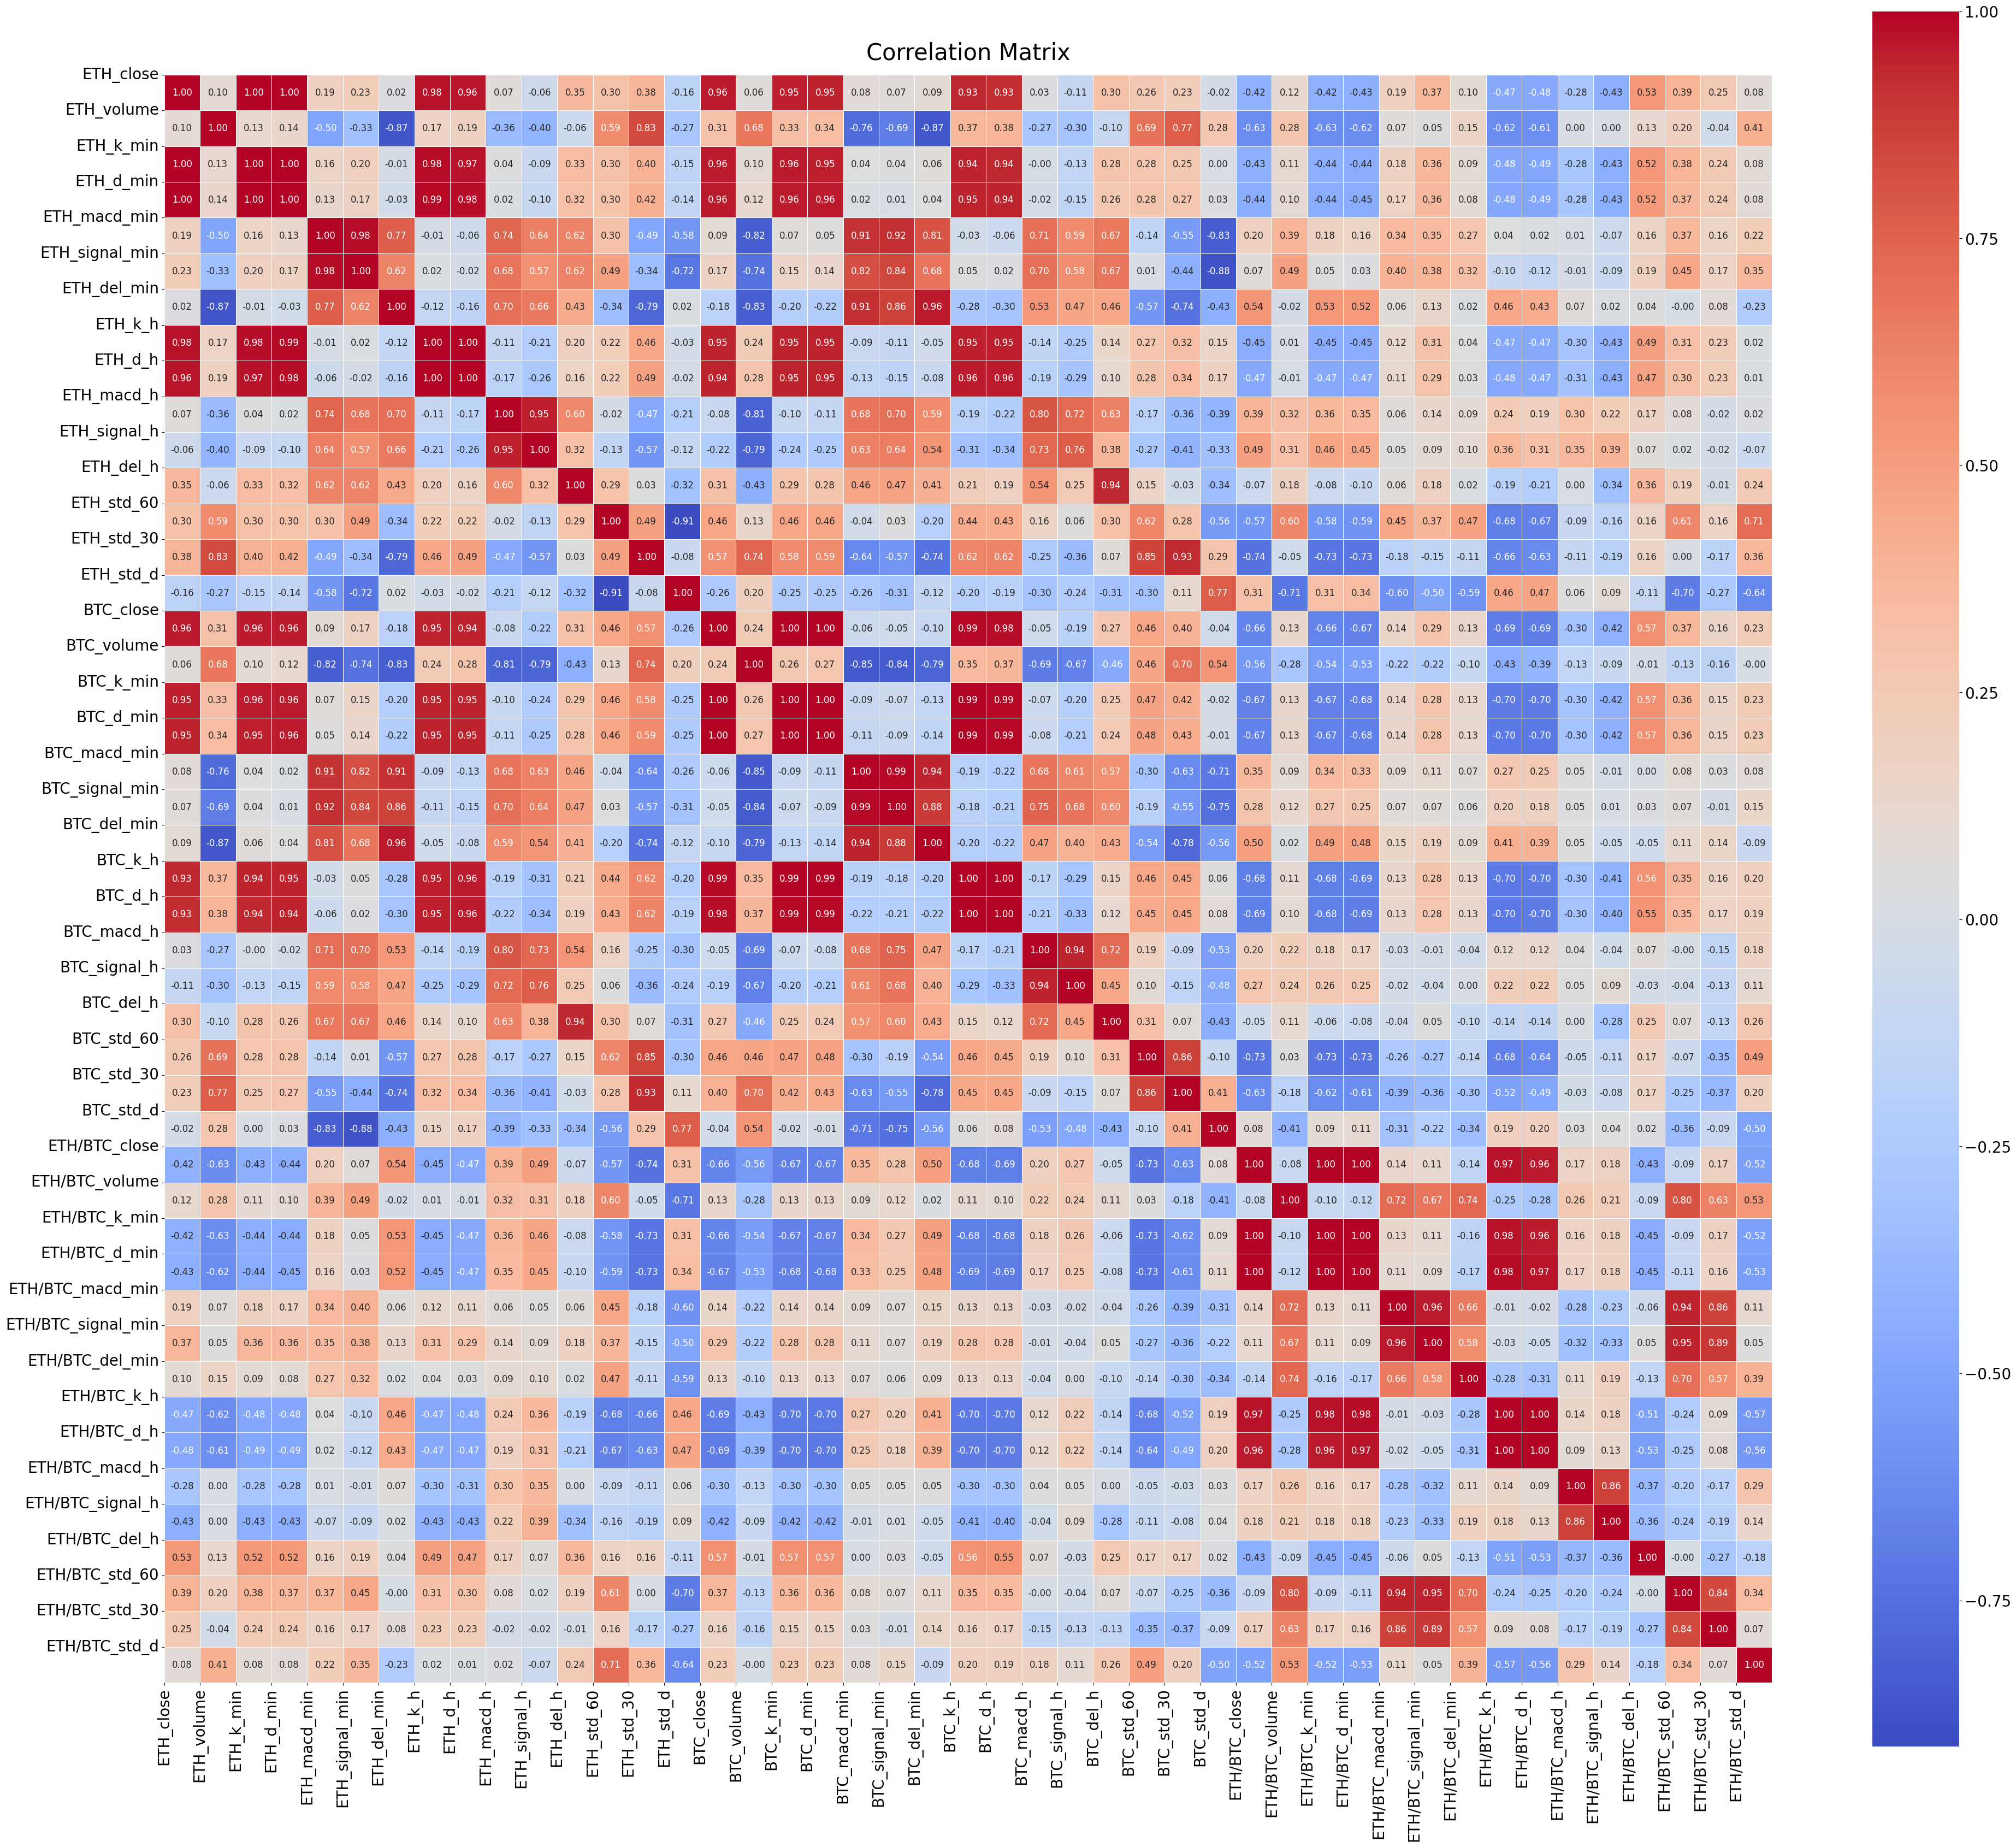

In [ ]:
# let's build a correlation matrix

plt.figure(figsize=(40, 40))

heatmap = sns.heatmap(
    df_X.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={'size': 12},
    cbar_kws={'shrink': 0.8}
)

plt.xticks(
    range(df_X.select_dtypes(['number']).shape[1]),
    df_X.select_dtypes(['number']).columns,
    fontsize=20,
    rotation=90
)
plt.yticks(
    range(df_X.select_dtypes(['number']).shape[1]),
    df_X.select_dtypes(['number']).columns,
    fontsize=20
)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.title('Correlation Matrix', fontsize=30, pad=20)

plt.tight_layout()
plt.savefig('correlation_matrix.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# ML models

random_prm = 42
np.random.seed(random_prm)
tf.random.set_seed(random_prm)

n_splits = 5
small_value = epsilon

kf = KFold(n_splits = n_splits, shuffle = True, random_state = random_prm)

scalers_nn, scalers_cb, scalers_lstm = [], [], []
nn_train_rmse, nn_test_rmse = [], []
cb_train_rmse, cb_test_rmse = [], []
lstm_train_rmse, lstm_test_rmse = [], []

# Best models
best_nn_model = None
best_cb_model = None
best_lstm_model = None
best_nn_rmse = float('inf')
best_cb_rmse = float('inf')
best_lstm_rmse = float('inf')

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Normalizing data within a fold
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train.get())
    X_test_scaled = scaler_X.transform(X_test.get())

    scalers_nn.append(scaler_X)
    scalers_cb.append(scaler_X)
    scalers_lstm.append(scaler_X)

    # Neural network
    tf.keras.utils.set_random_seed(random_prm)
    model_NN = Sequential()
    model_NN.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
    model_NN.add(Dense(64, activation='relu'))
    model_NN.add(Dense(32, activation='relu'))
    model_NN.add(Dense(16, activation='relu'))
    model_NN.add(Dense(tau + 1, activation='softmax'))
    model_NN.compile(loss='mse', optimizer='adam', metrics=['mse'])

    # Early stopping for neural network
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_NN.fit(
        X_train_scaled, y_train.get(),
        validation_data=(X_test_scaled, y_test.get()),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    train_pred = model_NN.predict(X_train_scaled)
    test_pred = model_NN.predict(X_test_scaled)
    nn_train_rmse.append(np.sqrt(mean_squared_error(y_train.get(), train_pred)))
    nn_test_rmse.append(np.sqrt(mean_squared_error(y_test.get(), test_pred)))

    # Saving the best neural network model
    if nn_test_rmse[-1] < best_nn_rmse:
        best_nn_rmse = nn_test_rmse[-1]
        best_nn_model = model_NN
        best_scaler_nn = scaler_X

    # CatBoost
    model_CB = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiRMSE',
    verbose=100,
    task_type='GPU',
    devices='0:1',
    boosting_type='Plain',
    early_stopping_rounds=100,
    random_seed=random_prm)


    model_CB.fit(X_train_scaled, y_train.get(), eval_set=(X_test_scaled,
                                                          y_test.get()), use_best_model=True, verbose=0)

    y_pred_train = model_CB.predict(X_train_scaled)
    y_pred_test = model_CB.predict(X_test_scaled)
    y_pred_train_normalized = y_pred_train / np.sum(y_pred_train, axis=1, keepdims=True)
    y_pred_test_normalized = y_pred_test / np.sum(y_pred_test, axis=1, keepdims=True)
    cb_train_rmse.append(np.sqrt(mean_squared_error(y_train.get(), y_pred_train_normalized)))
    cb_test_rmse.append(np.sqrt(mean_squared_error(y_test.get(), y_pred_test_normalized)))

    # Save best model
    if cb_test_rmse[-1] < best_cb_rmse:
        best_cb_rmse = cb_test_rmse[-1]
        best_cb_model = model_CB
        best_scaler_cb = scaler_X

    print()

# Average fold errors
print("Neural network:")
print(f"av Train RMSE: {np.mean(np.array(nn_train_rmse)):.2f}")
print(f"av Test RMSE: {np.mean(np.array(nn_test_rmse)):.2f}")

print("\nCatBoost:")
print(f"av Train RMSE: {np.mean(np.array(cb_train_rmse)):.2f}")
print(f"av Test RMSE: {np.mean(np.array(cb_test_rmse)):.2f}")

# # Preserving the best models
best_nn_model.save('best_model_NN_c3t40.keras')
best_cb_model.save_model('best_model_CB_c3t40.cbm')

# Saving scaler_X for better models
joblib.dump(best_scaler_nn, 'best_scaler_X_nn_c3t40.pkl')
joblib.dump(best_scaler_cb, 'best_scaler_X_cb_c3t40.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step



Neural network:
av Train RMSE: 0.01
av Test RMSE: 0.02

CatBoost:
av Train RMSE: 0.01
av Test RMSE: 0.02


['best_scaler_X_cb_c3t40.pkl']

In [ ]:
# LSTM

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

scaler_X_LSTM = StandardScaler()
X_train_scaled = scaler_X_LSTM.fit_transform(X_train.get())
X_test_scaled = scaler_X_LSTM.transform(X_test.get())

joblib.dump(scaler_X_LSTM, 'scaler_X_LSTM_c3t40.pkl')

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model_LSTM = Sequential()
model_LSTM.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(tau + 1, activation='softmax'))
model_LSTM.compile(loss='mse', optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = model_LSTM.fit(
    X_train_lstm, y_train.get(),
    validation_data=(X_test_lstm, y_test.get()),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

train_pred_lstm = model_LSTM.predict(X_train_lstm)
test_pred_lstm = model_LSTM.predict(X_test_lstm)
train_rmse_lstm = np.sqrt(mean_squared_error(y_train.get(), train_pred_lstm))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test.get(), test_pred_lstm))

print("LSTM:")
print(f"Train RMSE: {train_rmse_lstm:.2f}")
print(f"Test RMSE: {test_rmse_lstm:.2f}")

model_LSTM.save('best_model_LSTM_c3t40.keras')

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 2.4528e-04 - mse: 2.4528e-04 - val_loss: 3.6900e-04 - val_mse: 3.6900e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 2.4522e-04 - mse: 2.4522e-04 - val_loss: 3.6868e-04 - val_mse: 3.6868e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 2.4706e-04 - mse: 2.4706e-04 - val_loss: 3.6825e-04 - val_mse: 3.6825e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 2.4611e-04 - mse: 2.4611e-04 - val_loss: 3.6792e-04 - val_mse: 3.6792e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2.4108e-04 - mse: 2.4108e-04 - val_loss: 3.6757e-04 - val_mse: 3.6757e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2.4191e-04 - mse: 2.4191e-04 - val_loss: 3.6736e-04 - val_mse: 3.6736e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 2.3451e-04 - mse: 2.3451e-04 - val_loss: 3.6726e-04 - val_mse: 3.6726e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 2.3574e-04 - mse: 2.

In [ ]:
# Train the integ and stacking model
best_scaler_nn = joblib.load('best_scaler_X_nn_c3t40.pkl')
best_scaler_cb = joblib.load('best_scaler_X_cb_c3t40.pkl')
scaler_X_LSTM = joblib.load('scaler_X_LSTM_c3t40.pkl')
best_nn_model = load_model('best_model_NN_c3t40.keras')
best_cb_model = CatBoostRegressor()
best_cb_model.load_model('best_model_CB_c3t40.cbm')
model_LSTM = load_model('best_model_LSTM_c3t40.keras')

X_int = X.copy().get()
X_int_scaled_nn = best_scaler_nn.transform(X_int)
X_int_scaled_cb = best_scaler_cb.transform(X_int)
X_int_scaled_lstm = scaler_X_LSTM.transform(X_int)
X_int_scaled_lstm = X_int_scaled_lstm.reshape((X_int_scaled_lstm.shape[0], 1,
                                               X_int_scaled_lstm.shape[1]))

# Predictions total X
nn_int_pred = np.asarray(best_nn_model.predict(X_int_scaled_nn))
cb_int_pred = np.asarray(best_cb_model.predict(X_int_scaled_cb))
lstm_int_pred = np.asarray(model_LSTM.predict(X_int_scaled_lstm))

nn_int_pred_normalized = normalize_predictions(nn_int_pred)
cb_int_pred_normalized = normalize_predictions(cb_int_pred)
lstm_int_pred_normalized = normalize_predictions(lstm_int_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# Integ

X_int_train, X_int_test, y_int_train, y_int_test = train_test_split(
    np.stack([nn_int_pred_normalized, cb_int_pred_normalized, lstm_int_pred_normalized], axis=-1),
    y,
    test_size=0.2,
    random_state=42
)

# Function for minimization (MSE)
def objective(weights, X, y, alpha=0.001):
    y_pred = np.sum(X * weights, axis=-1)
    mse = np.mean((y_pred - y) ** 2)  # MSE
    regularization = alpha * np.sum(weights**2)  # L2-regularization
    return mse + regularization

initial_weights = np.array([1/3, 1/3, 1/3])

# Limitations: weights must be positive and sum to 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

result = minimize(objective, initial_weights.get(), args=(X_int_train.get(), y_int_train.get()),
                  method='SLSQP', constraints=constraints, bounds=[(0.01, 1)] * 3)

optimal_weights = np.asarray(result.x)
print("Optimal weights:", optimal_weights)

y_int_test_pred = np.sum(X_int_test * optimal_weights, axis=-1)

rmse = np.sqrt(mean_squared_error(y_int_test.get(), y_int_test_pred.get()))
print("RMSE on test data:", rmse)

np.save('optimal_weights_c3t40.npy', optimal_weights)

Optimal weights: [0.33333333 0.33333333 0.33333333]
RMSE on test data: 0.011840371735375423


In [ ]:
# OOT
df_oot.head()

,price,vol
transaction.timestamp,,
2024-09-01 00:01:59,2511.245102,9990.278693
2024-09-01 00:09:23,2510.907936,351.406544
2024-09-01 00:25:23,2510.883891,386.107195
2024-09-01 00:25:35,2510.436300,13343.139536
2024-09-01 00:25:47,2509.607443,52.025310


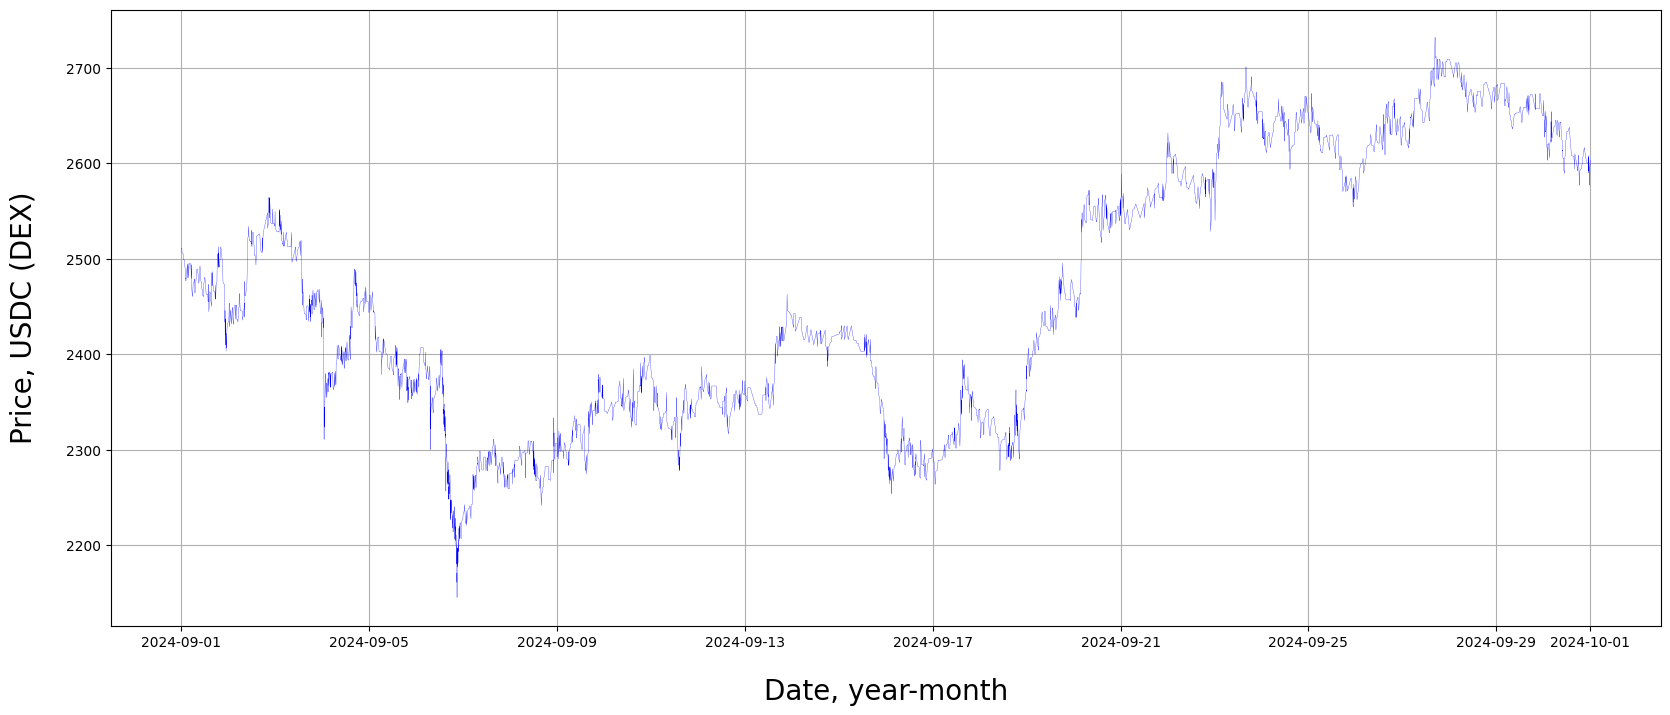

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df_oot['price'], linewidth = 0.2, color='blue', alpha = 1)

ax.set_xlabel('Date, year-month', labelpad = 20, fontsize = 20)
ax.set_ylabel('Price, USDC (DEX)', labelpad = 20, fontsize = 20)
ax.grid()
plt.show()

In [ ]:
# Find the moments of the change of epoch under tau = 5
#  for given the parameters on OOT

# cu_pr_oot = np.mean(df_oot['price']).item() # select distribution center
price_test_oot = np.array(df_oot['price'])
prices_c_oot = price_test_oot.reshape(1, -1)
range_prices_oot = range_prices_

pr_oot = prices_c_oot[0] # it is possible to submit a set of price arrays. now just one
ind_in_oot = np.digitize(pr_oot, range_prices_oot[2], right = True)
z_moments_t_oot = z_list_t(tau, pr_oot.get(), mu_bucket, ind_in_oot.get()) # moments of capital relocation for tau = 5. without the last one!

z_list_oot = z_moments_t_oot
z_list_oot = np.hstack((z_list_oot, len(df_oot['price']))) # add the last moment
pr_total_oot = pr_oot

ep_n_oot = np.zeros((len(df_oot))).astype(int) # the epoch of each observation

for i in tqdm(range(0, len(z_list_oot) - 1)):
    ep_n_oot[z_list_oot[i]: z_list_oot[i + 1] + 1] = int(i)

100%|██████████| 1/1 [00:00<00:00, 1977.51it/s]


In [ ]:
ep_time_ar = df_oot.index[np.hstack((z_moments_t_oot,len(df_oot['price'])-1)).get()]
ep_time_ar = np2.diff(ep_time_ar).astype('timedelta64[h]')
print('average duration of an epoch:', '\n',
      np.mean(ep_time_ar), '\n',
      np.round(np.mean(np.diff(z_list_oot)),1), 'prices')

average duration of an epoch: 
 719 hours 
 8396.0 prices


In [ ]:
model_input_oot = np.zeros((len(z_moments_t_oot), 45))

for j, t in enumerate(z_moments_t_oot):

    indx_moment = find_nearest_d(eth_df.index, df_oot.index[t.item()])[1]
    l_rng = indx_moment - 1440 * 7
    r_rng = indx_moment + 1
    eth_fs = data_transform(
        eth_df.iloc[l_rng:r_rng], macd_1_, macd_2_, std_long_, std_short_).iloc[-1].values
    btc_fs = data_transform(
        btc_df.iloc[l_rng:r_rng], macd_1_, macd_2_, std_long_, std_short_).iloc[-1].values

    model_input_oot[j] = np.hstack((eth_fs, btc_fs, eth_fs / btc_fs))

pd.DataFrame(model_input_oot.get())

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,2511.59,0.9531,2512.746957,2513.212948,-0.465991,-0.217746,-0.248244,2512.758864,2514.980496,-2.221633,...,-0.095656,0.491422,0.042584,0.042583,0.041037,0.032569,0.496651,0.060242,0.083974,-0.002783


In [ ]:
# pd.DataFrame(model_input_oot.get()).to_excel('oot_upd_c3t10.xlsx')

In [ ]:
# Loading models and scaler_X
best_scaler_nn = joblib.load('best_scaler_X_nn_c3t40.pkl')
best_scaler_cb = joblib.load('best_scaler_X_cb_c3t40.pkl')
scaler_X_LSTM = joblib.load('scaler_X_LSTM_c3t40.pkl')
best_nn_model = load_model('best_model_NN_c3t40.keras')
best_cb_model = CatBoostRegressor()
best_cb_model.load_model('best_model_CB_c3t40.cbm')
model_LSTM = load_model('best_model_LSTM_c3t40.keras')
optimal_weights = np.asarray(np.load('optimal_weights_c3t40.npy'))

X_oot = model_input_oot.get()
X_oot_scaled_nn = best_scaler_nn.transform(X_oot)
X_oot_scaled_cb = best_scaler_cb.transform(X_oot)
X_oot_scaled_lstm = scaler_X_LSTM.transform(X_oot)
X_oot_scaled_lstm = X_oot_scaled_lstm.reshape((X_oot_scaled_lstm.shape[0], 1,
                                               X_oot_scaled_lstm.shape[1]))

# Predictions OOT
nn_new_pred = np.asarray(best_nn_model.predict(X_oot_scaled_nn))
cb_new_pred = np.asarray(best_cb_model.predict(X_oot_scaled_cb))
lstm_new_pred = np.asarray(model_LSTM.predict(X_oot_scaled_lstm))

nn_new_pred_normalized = normalize_predictions(nn_new_pred)
cb_new_pred_normalized = normalize_predictions(cb_new_pred)
lstm_new_pred_normalized = normalize_predictions(lstm_new_pred)

int_oot = np.stack([nn_new_pred_normalized, cb_new_pred_normalized, lstm_new_pred_normalized], axis=-1)
int_oot = np.sum(int_oot * optimal_weights, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


In [ ]:
# first 2 epoch's opt strategy for 3 models
display('NN model', pd.DataFrame(nn_new_pred_normalized.get()).iloc[:2,:],
        'CB model', pd.DataFrame(cb_new_pred_normalized.get()).iloc[:2,:],
        'LSTM model', pd.DataFrame(lstm_new_pred_normalized.get()).iloc[:2,:],
        'Integral model', pd.DataFrame(int_oot.get()).iloc[:2,:])

'NN model'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.026348,0.021385,0.02239,0.022296,0.028349,0.031244,0.032886,0.027399,0.027377,0.022834,...,0.027587,0.025295,0.019642,0.02216,0.02707,0.016563,0.016355,0.020766,0.022826,0.024695


'CB model'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.039457,0.028373,0.023801,0.034047,0.030451,0.029694,0.02758,0.027743,0.03322,0.027693,...,0.020971,0.012684,0.021725,0.024062,0.017895,0.01857,0.012238,0.014951,0.01495,0.017197


'LSTM model'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.020528,0.035206,0.024704,0.017838,0.01794,0.020366,0.024261,0.025574,0.023412,0.021708,...,0.021203,0.033645,0.020954,0.022037,0.018695,0.018442,0.029375,0.020427,0.026423,0.018719


'Integral model'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.028778,0.028321,0.023632,0.024727,0.02558,0.027101,0.028242,0.026905,0.028003,0.024079,...,0.023254,0.023875,0.020774,0.022753,0.02122,0.017858,0.019323,0.018715,0.0214,0.020204


In [ ]:
un_vector = np.zeros(tau + 1)
un_vector[0] = 1 / (2* tau + 1)
un_vector[1:] = 2 * un_vector[0]
un_ar = np.tile(un_vector, (nn_new_pred_normalized.shape[0], 1))

combined_str = np.stack((un_ar, nn_new_pred_normalized, cb_new_pred_normalized,
                         lstm_new_pred_normalized, int_oot), axis=0)

In [ ]:
fin_pool_check = 0
fact_pool_check = 0
fact_pool_Mf_check = 0

W_LP = 1000000
tvl = 40000000
W_initial = tvl

epsilon = 1e-60
var_set_gpu = np.asarray(var_set)
sigma_gpu = np.sqrt(var_set_gpu)

i_total = 0
res_array_tst = np.zeros((pr_total_oot.shape[0], 4))

range_prices_ep = range_prices_oot

In [ ]:
# mu&var oot elastic fast

fin_pool_check = 0
fact_pool_check = 0
fact_pool_Mf_check = 0

W_LP = 1000000
tvl = 40000000
W_initial = tvl

epsilon = 1e-60
var_set_gpu = np.asarray(var_set)
sigma_gpu = np.sqrt(var_set_gpu)

i_total = 0
res_array_tst = np.zeros((pr_total_oot.shape[0], 4))

range_prices_ep = range_prices_oot

for i in tqdm(range(0, len(z_list_oot) - 1)):

    fact_return_ep_total = np.asarray(df_oot['vol'].values[z_list_oot[i].item(): z_list_oot[i + 1].item() + 1])
    price_test_total = np.asarray(pr_total_oot[z_list_oot[i]: z_list_oot[i + 1] + 1])

    buckets_price, buckets_vol = sliding_windows_(price_test_total, fact_return_ep_total, 2)

    i_tst = 0

    prices_c_ep = price_test_total.flatten()

    for bucket in buckets_price[:]:

        fact_return_ep = np.sum(np.asarray(buckets_vol[i_tst])) * gamma
        price_test = np.asarray(bucket)

        cu_pr_ep = np.mean(price_test)
        m_r = 0
        while cu_pr_ep - av_w * (apprx_n // 2 + 1) < 0:
            cu_pr_ep += av_w
            m_r += 1

        i_tst += 1
        i_total += 1

        prices_c_ep = price_test.flatten()

        res_array_tst[i_total, 0] = fact_return_ep
        fact_pool_check += fact_return_ep

        ind_in_ep = np.digitize(prices_c_ep, range_prices_ep[2], right = True)

        mu_find = False

        for indx_m, mu in enumerate(mu_range):

            if mu_find == False:

                capacity_all = stats.norm.pdf(x.get()[None, :], mu.item(), sigma_gpu.get()[:, None])
                capacity_all /= capacity_all.sum(axis=1, keepdims=True)
                xi_ar_list_0 = np.asarray(capacity_all)
                xi_ar_list = np.maximum(x_Nd_best_pool(mu_bucket, apprx_n, cu_pr_ep,
                                                   range_prices_ep[2], xi_ar_list_0), epsilon)

                res_mu = find_and_check_nearest(v3_model_max_el(W_initial, prices_c_ep, xi_ar_list, mu_bucket, range_prices_ep[0],
                range_prices_ep[1], range_prices_ep[2], ind_in_ep, gamma), fact_return_ep, threshold=0.1)

                mu_find = res_mu[2].item()

                if mu_find:

                    res_array_tst[i_total, 1] = res_mu[0].item()
                    fin_pool_check += res_mu[0].item()
                    res_array_tst[i_total, 2] = mu.item()
                    res_array_tst[i_total, 3] = var_set_gpu[res_mu[1].item()]

        if not mu_find:

            res_array_tst[i_total, 2] = 1000

        if i_total % 1000 == 0:

            print(fin_pool_check, fact_pool_check)
            pd.DataFrame(res_array_tst.get()).to_excel('drive/MyDrive/vega/upd_copy/fast_OOT_ARRAY_ELASTIC_100.xlsx')

print(fin_pool_check, fact_pool_check)
pd.DataFrame(res_array_tst.get()).to_excel('drive/MyDrive/vega/upd_copy/fast_OOT_ARRAY_ELASTIC_100.xlsx')

 11%|█         | 5/45 [01:39<13:53, 20.83s/it]

31989.00914530837 32531.209659465


 24%|██▍       | 11/45 [03:16<11:15, 19.87s/it]

68649.49175180968 69680.22976821003


 42%|████▏     | 19/45 [04:39<05:48, 13.39s/it]

105745.966081759 107291.82121066816


 49%|████▉     | 22/45 [06:15<09:17, 24.22s/it]

142618.26041950958 144754.47291008712


 56%|█████▌    | 25/45 [08:03<09:05, 27.30s/it]

172862.9644431213 175452.51765289187


 71%|███████   | 32/45 [10:07<03:09, 14.55s/it]

213335.59964473906 216510.70466891103


 82%|████████▏ | 37/45 [11:27<01:40, 12.61s/it]

255421.42622730517 259317.23375068186


 96%|█████████▌| 43/45 [13:22<00:35, 17.70s/it]

291722.1119252679 296428.2516549151


100%|██████████| 45/45 [14:20<00:00, 19.12s/it]


306965.74949890596 311869.6470348635


In [ ]:
# run or download

res_array_tst = pd.read_excel('fast_OOT_ARRAY_ELASTIC_100.xlsx').iloc[:,1:].values
oot_res_fast = res_array_tst

In [ ]:
fin_pool_check = 0
fact_pool_check = 0

tvl = 40000000
W_initial = tvl
W_LP = 1000000
W_LP = np.asarray(np2.repeat(W_LP, combined_str.shape[0]),
                  dtype=np.float64).reshape(combined_str.shape[0], 1)
gas_pr = 20
gamma = 0.003
r_d = 3

x = np.linspace(-r_d, r_d, apprx_n)
mu_step = 0.5
mu_minmax = r_d
mu_range = np.arange(-mu_minmax, mu_minmax + mu_step, mu_step)

epsilon = 1e-60
var_set_gpu = np.asarray(var_set)
sigma_gpu = np.sqrt(var_set_gpu)

IN_COST = True
FIX_VAR = True
REIN_RS = False
DYN_Wlp = True
Type_M = 1

cost_fin = 0

i_total = 0
res_array_tst = np.zeros((pr_total_oot.shape[0], 8 + 2 * combined_str.shape[0]))

for i in tqdm(range(0, len(z_list_oot) - 1)):

    fact_return_ep_ar = np.asarray(df_oot['vol'].values[z_list_oot[i].item(): z_list_oot[i + 1].item() + 1])
    price_test_total = np.asarray(pr_total_oot[z_list_oot[i]: z_list_oot[i + 1] + 1])

    if i_total == 0:
        res_array_tst[i_total, 7] = price_test_total[0]
        res_array_tst[i_total,8:-combined_str.shape[0]] = W_LP.flatten()

    price_test_len = len(price_test_total) if i == (len(z_list_oot) - 2) else len(price_test_total) - 1

    prices_c_ep = price_test_total.flatten()
    cu_pr_ep = np.mean(price_test_total)

    ind_in_ep = np.digitize(prices_c_ep, range_prices_ep[2], right = True)

    mu_find = False

    LP_strs_ep = combined_str[:,i,:]
    LP_strs_ep_pool = x_Nd_best(tau, mu_bucket, prices_c_ep[:1], range_prices_ep[2], LP_strs_ep)[0]

    res_array_tst[i_total + 1, 5] = np.std(price_test_total)
    i_tst = 0

    if i !=0 and REIN_RS:
        W_LP += fee_ep.reshape(combined_str.shape[0], 1)

    fee_ep = np.zeros((1, combined_str.shape[0]))

    buckets_price, buckets_vol = sliding_windows(price_test_total, fact_return_ep_ar, 2)

    for bucket in buckets_price[:]:

        fact_return_ep_b = np.sum(np.array(buckets_vol[i_tst])).item() * gamma
        price_test_b = np.array(bucket)

        mu_find = True

        cu_pr_ep = np.mean(price_test_b)
        m_r = 0
        while cu_pr_ep - av_w * (apprx_n // 2 + 1) < 0:
            cu_pr_ep += av_w
            m_r += 1

        i_tst += 1
        i_total += 1

        if IN_COST and i_tst == 1:
            cost = 2 * 215000 * gas_pr * 10**(-9) * price_test_b[0] * (2 * tau + 1)
            res_array_tst[i_total, 6] = cost.item()
            cost_fin += cost.item()
            W_LP -= np.asarray(np2.repeat(cost, combined_str.shape[0]), dtype=np.float64).reshape(combined_str.shape[0], 1)#cost.item()

        res_array_tst[i_total, 0] = fact_return_ep_b
        fact_pool_check += fact_return_ep_b

        res_array_tst[i_total, 7] = price_test_b[-1]
        ind_in_ep = np.digitize(price_test_b, range_prices_ep[2], right = True)

        if oot_res_fast[i_total,2] != 1000:

            mu = oot_res_fast[i_total,2]
            var = oot_res_fast[i_total,3]
            sigma = math.sqrt(var)

            capacity = stats.norm.pdf(x.get(), mu.item(), sigma)
            capacity /= np.sum(capacity)
            pool_opt_0 = np.asarray(np.tile(capacity, (1,1)))
            pool_opt = np.maximum(x_Nd_best_pool(mu_bucket, apprx_n, cu_pr_ep,
                                                   range_prices_ep[2], pool_opt_0), epsilon)

            res_ = v3_model_LP_max(W_initial, W_LP, price_test_b,
                                                         pool_opt, LP_strs_ep_pool, mu_bucket,
                                                         range_prices_ep[0], range_prices_ep[1],
                                                         range_prices_ep[2], ind_in_ep, gamma, Type_M, DYN_Wlp)
            # check pool fees
            res_array_tst[i_total, 4] = v3_model_max_el(W_initial, price_test_b, pool_opt,
                                                        mu_bucket, range_prices_ep[0],range_prices_ep[1],
                                                        range_prices_ep[2], ind_in_ep, gamma)

            if FIX_VAR and mu == -3:
                res_array_tst[i_total,-combined_str.shape[0]:] = 0
                fee_ep += 0
            else:
                res_array_tst[i_total,-combined_str.shape[0]:] = res_[0]
                fee_ep += res_[0]

            res_array_tst[i_total, 1] = res_[1].item()
            res_array_tst[i_total, 2] = mu.item()
            res_array_tst[i_total, 3] = var.item()

            W_LP = res_[2].reshape(combined_str.shape[0], 1)

        else:
            W_LP = W_LP

        if IN_COST and buckets_price[:].shape[0] == i_tst:
            cost = 215000 * gas_pr * 10**(-9) * price_test_b[-1] * (2 * tau + 1)
            res_array_tst[i_total, 6] = cost.item()
            cost_fin += cost.item()
            W_LP -= cost.item()

        res_array_tst[i_total, 8:-combined_str.shape[0]] = W_LP.flatten()

pd.DataFrame(res_array_tst.get()).to_excel('drive/MyDrive/vega/upd_copy/OOT_ARRAY_ELASTIC_100_final_noRET_FEES_t40.xlsx')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
columns_t = ["FctRts_P", "MRts_P", "Mu_P", "Var_P",
             "check Model Rts P", "std ep", "Costs LP",
             "Price", "W_LP flt", "W_LP NN", "W_LP CB", "W_LP LSTM", "W_LP Inter",
             "flat", "NN", "CB", "LSTM", "Inter"]

noR_oot_df = pd.DataFrame(res_array_tst.get(), columns = columns_t)

noR_oot_df.to_excel('drive/MyDrive/vega/upd_copy/OOT_ARRAY_ELASTIC_100_final_noRET_FEES_t40.xlsx')

In [ ]:
# NO reinvest | Accumulated LP Fees
noR_oot_df.iloc[:,-combined_str.shape[0]:].sum()

,0
flat,14363.593920
NN,15268.627648
CB,15854.597765
LSTM,14308.361567
Inter,15143.784301
